# Data Analysis - all data

In this notebook, we analyzed the combined data resulting from the three experiments conducted with the "**AR**ound the world" app in 3 schools in San Sebastian, Spain. The data includes both the raw data compiled from the app and the student surveys. There are two types of students based on the device they use during the experiment: users who used the app from a PC (they can see what other students do and provide suggestions, and replace AR content with 3D objects from a Three.js canvas) or mobile (users with a tablet or cellphone, they can also receive questions from the teacher and answer them).

After the trial, the students were given a survey consisting of a number of questions, which they had to rate from 1 to 5. There were 16 common questions, 2 questions phrased slightly differently for mobile/PC users, and 2 questions only for mobile users.

## Student surveys

In this section we will analyse the student surveys that were completed after the experiment. 
This is the full list of questions:

1. I think that I would like to use the application frequently.
2. I found the application to be simple.
3. I thought the application was easy to use.
4. I think that I could use the application without the support of a technical person.
5. I found the various functions in the application were well integrated
6. I would imagine that most people would learn to use the application very quickly.
7. I found the application very intuitive.
8. I felt very confident using the application.
9. I could use the application without having to learn anything new.
10. I would like to use the application during a test
11. Being able to provide suggestions made me feel more involved
12. Receiving suggestions made me more confident when answering a question
13. At all times I have been able to understand what the person who had to respond to the exercise was doing
14. I find it more interesting to solve the exercises through the application than through a web page or in writing
15. Suggestions from my classmates have helped me when answering the exercise
16. The device used  has allowed me to use the application easily
17. I would like to use the application to learn new concepts
18. Being able to use augmented reality / 3D elements makes the application more entertaining
19. There are several ways to collaborate with my classmates through the application
20. Thanks to augmented reality / 3D elements I have felt immersed in the learning activity

Questions #12 and #15 only appeared in the questionnaires filled by students using a mobile device, since students on a PC did not have the possibility to answer questions through the app or receive suggestions.

The 2 questions phrased differently are #18 and #20, where the words "augmented reality" were used in the questionnaires filled by the students using a mobile device, and "3D elements" in case of students on PC.


In [1]:
# If you want to use help from chatGPT, uncomment the following line
#%load_ext ask_ai.magics
# make sure that you have stored your OpenAI API key in the variable OPENAI_API_KEY

In [2]:
# And import the necessary libraries. xapi_analysis is the package we created to help analysing xapi statements
from xapi_analysis.input_csv import *
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from typing import Set, List, Union
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Let's also set some useful display constants for pandas
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 500

# And something for plotting better images, too.
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 18     # fontsize of the axes title
plt.rcParams['axes.labelsize'] = 14    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 13    # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 13    # legend fontsize
plt.rcParams['font.size'] = 13
cmap_cont = sns.color_palette('crest', as_cmap=True)
cmap_disc = sns.color_palette('RdYlBu_r')

img_folder = Path('images')

In [3]:
SURVEY_FILE = Path('./questionnaire_answers.xlsx')
SHEET_NAMES = ['SALESIANOS', 'ZUBIRI_MANTEO', 'DEUSTO'] # orderd by age
NUM_ROWS = 22
COLS = [list(range(4, 21)), list(range(4, 21)), list(range(4, 14))]

frames = []
for idx, s in enumerate(SHEET_NAMES):
    frames.append(pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAMES[idx], nrows=NUM_ROWS, usecols=COLS[idx]))
    
survey_answers = pd.concat(frames, axis=1)
survey_answers.index += 1 # so index value is the same as the question number
survey_answers = survey_answers.astype('Int64')

questions = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAMES[0], nrows=NUM_ROWS, usecols=[2])
questions.index += 1 # so index value is the same as the question number

q_type = pd.read_excel(SURVEY_FILE, sheet_name=SHEET_NAMES[0], nrows=NUM_ROWS, usecols=[3])
q_type.index += 1

Let's have a quick look at the data

In [4]:
survey_answers.head()

,iPad1,iPad2,Tablet1,Tablet2,iPhone1,Android1,Android2,Android3,Android4,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009,iPad202,Tablet201,Tablet202,iPhone201,iPhone202,Android201,Android202,Android203,Android204,PC021,PC022,PC023,PC024,PC025,PC026,PC028,PC029,iPad101,Tablet101,Tablet102,iPhone101,iPhone102,Android101,Android102,Android103,Android104,PC010
1,3,3,4,5,3,5,4,3,3,3,3,3,3,1,4,3,4,3,3,4,4,3,5,1,4,4,5,3,1,4,3,5,4,5,4,3,4,4,4,3,4,4,3,1
2,4,4,5,4,3,2,3,3,3,4,4,4,3,2,4,4,5,5,4,5,5,5,5,4,4,5,4,3,5,5,2,3,5,4,5,4,4,4,5,4,4,5,3,3
3,4,3,4,4,3,4,3,3,4,5,4,3,2,1,4,4,5,5,4,5,5,5,5,4,4,5,5,2,5,5,5,5,5,4,4,4,4,4,4,3,4,4,4,4
4,5,4,3,4,5,4,2,2,4,5,4,4,4,1,3,4,5,5,4,5,4,5,5,5,5,5,5,3,5,5,2,4,4,3,3,4,4,4,4,3,5,3,3,4
5,5,4,4,4,3,5,4,3,3,4,4,4,4,2,3,4,5,4,3,3,4,4,4,3,5,5,5,4,4,5,4,5,4,3,4,4,4,4,4,2,4,4,5,3


In [5]:
survey_answers.describe()

,iPad1,iPad2,Tablet1,Tablet2,iPhone1,Android1,Android2,Android3,Android4,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009,iPad202,Tablet201,Tablet202,iPhone201,iPhone202,Android201,Android202,Android203,Android204,PC021,PC022,PC023,PC024,PC025,PC026,PC028,PC029,iPad101,Tablet101,Tablet102,iPhone101,iPhone102,Android101,Android102,Android103,Android104,PC010
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,18.0
mean,4.15,4.0,4.2,3.9,3.6,3.9,3.7,3.35,3.65,4.055556,4.222222,4.055556,3.833333,2.333333,3.888889,4.222222,4.777778,4.4,3.35,3.7,4.4,4.3,4.4,2.75,4.5,4.8,4.833333,3.944444,4.666667,4.777778,3.611111,4.333333,4.555556,3.722222,4.0,3.9,4.1,3.7,4.4,3.1,4.4,4.25,3.75,2.666667
std,0.67082,0.794719,0.695852,0.718185,0.940325,1.020836,1.031095,0.67082,0.933302,0.872604,0.732084,1.055642,0.857493,1.084652,1.02262,0.548319,0.427793,0.820783,1.03999,1.174286,0.502625,0.656947,0.680557,1.585294,0.688247,0.410391,0.383482,0.872604,0.970143,0.427793,1.092159,0.766965,0.51131,0.751904,0.648886,0.640723,0.552506,0.864505,0.820783,0.718185,0.502625,0.638666,0.966546,1.283378
min,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,2.0,1.0,4.0,2.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,1.0
25%,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,3.0,2.75,4.0,4.0,4.0,1.0,4.0,5.0,5.0,3.25,5.0,5.0,3.0,4.0,4.0,3.0,4.0,3.75,4.0,3.0,4.0,3.0,4.0,4.0,3.0,1.25
50%,4.0,4.0,4.0,4.0,3.5,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,5.0,5.0,3.5,4.0,4.0,4.0,4.5,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.5,5.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,3.0
75%,5.0,4.25,5.0,4.0,4.0,5.0,4.25,4.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.75,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.75,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,4.25,4.0
max,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0


We also classified questions into four different groups (**Collaboration**, **Functionality**, **Usability**, **Educational**). Let's specify which questions belong to each group

In [6]:
collab = [1, 11, 12, 13, 15, 19]
functi = [5]
usabil = [2, 3, 4, 6, 7, 8, 9, 16]
educat = [10, 14, 17, 18, 20]

Before we plot the distribution of the answers per question, we need to sum the answers. We will have a new dataframe, with one row per question, and in the columns the percentage of answer in each category (**Strongly disagree**, **Disagree**, **Neutral**, **Agree**, **Strongly agree**)

In [7]:
df = survey_answers.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df.columns = ['SD', 'D', 'N', 'A', 'SA']
df.head()

,SD,D,N,A,SA
1,4,0,18,16,6
2,0,3,9,18,14
3,1,2,6,21,14
4,1,3,8,17,15
5,0,2,9,24,9


In [8]:
def stacked_barplot_100(df: Union[pd.DataFrame, pd.Series], # input dataframe
                        title: str=None,  # title of the plot,
                        q_idx: List=None,  # index of questions
                        fname: str=None    # filename where to save the image as tikz. If None, just show the plot
                       ):
    """
    Creates a 100% stacked bar plot to visualize the answers of the student survey.
    The input dataframe MUST have the columns SD, D, N, A, SA which represents the number of answers
    to a specific value in the Likert scale 
    """
    ax = plt.gca()
    
    ind = [x for x, _ in enumerate(df.index)]
    
    if q_idx is not None:
        df['Question_idx'] = q_idx
    else:
        df['Question_idx'] = list(range(1,21))
    df = df.sort_values(['Question_idx'], ascending=False)

    strongdisagree = df.SD
    disagree = df.D
    neutral = df.N
    agree = df.A
    strongagree = df.SA

    #calculate the percentages for the 100% stacked bars
    total = strongdisagree+disagree+neutral+agree+strongagree
    prop_strongdisagree = np.true_divide(strongdisagree, total) * 100
    prop_disagree = np.true_divide(disagree, total) * 100
    prop_neutral = np.true_divide(neutral, total) * 100
    prop_agree = np.true_divide(agree, total) * 100
    prop_strongagree = np.true_divide(strongagree, total) * 100

    #plot the bars
    ax.barh(ind, prop_strongagree, label='SA', color='#1b617b',
             left=prop_strongdisagree+prop_disagree+prop_neutral+prop_agree)
    ax.barh(ind, prop_agree, label='A', color='#879caf',
             left=prop_strongdisagree+prop_disagree+prop_neutral)
    ax.barh(ind, prop_neutral, label='N', color='#e7e7e7', left=prop_strongdisagree+prop_disagree)
    ax.barh(ind, prop_disagree, label='D', color='#e28e8e', left=prop_strongdisagree)
    ax.barh(ind, prop_strongdisagree, label='SD', color='#c71d1d') 

    #set the axes
    plt.yticks(ind, df.index)
    plt.ylabel("Question index")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlim(1.2)

    #fine tune the labels
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.grid(color='black', linestyle='-', axis="x", linewidth=1)
    ax.set_facecolor('white')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) + '%'))
    plt.tick_params(labelsize=16)

    if fname is not None:
        plt.savefig(img_folder / fname)
        
    plt.show()
                      

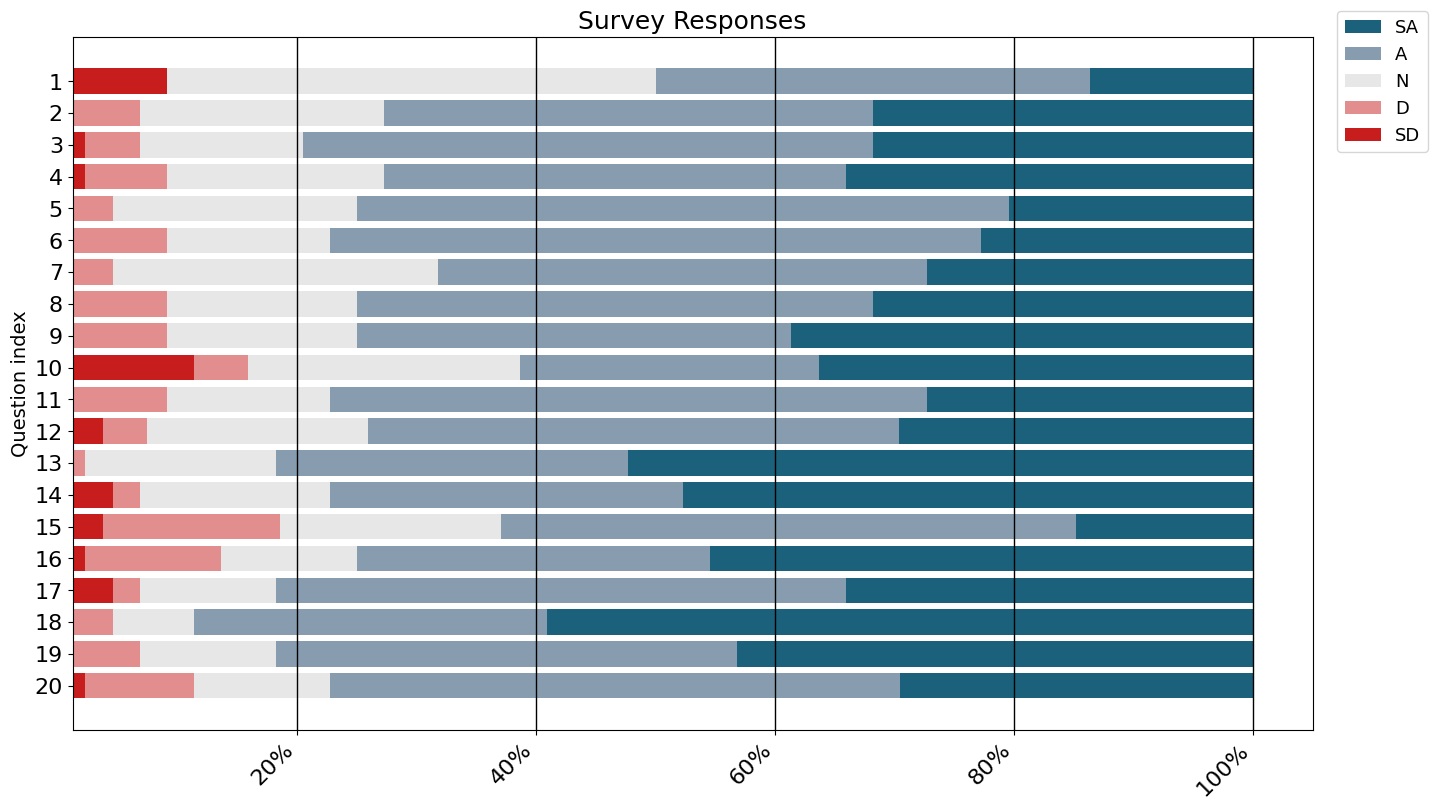

In [9]:
stacked_barplot_100(df, "Survey Responses", None, "Survey_All")

It seems that the majority of users answered **agree** or **strongly agree** to all the questions.
Let's have a look at the dataset with the percentages, too:

In [10]:
cols=['SA','A','N','D','SD']
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

df[cols] = df[cols].round(2)
df.insert(loc=0, column='Question', value=questions)
df = df.sort_values(['Question_idx'], ascending=True)
df.drop('Question_idx', axis=1)

,Question,SD,D,N,A,SA
1,I think that I would like to use the application frequently.,9.09,0.0,40.91,36.36,13.64
2,I found the application to be simple.,0.0,6.82,20.45,40.91,31.82
3,I thought the application was easy to use.,2.27,4.55,13.64,47.73,31.82
4,I think that I could use the application without the support of a technical person.,2.27,6.82,18.18,38.64,34.09
5,I found the various functions in the application were well integrated,0.0,4.55,20.45,54.55,20.45
6,I would imagine that most people would learn to use the application very quickly.,0.0,9.09,13.64,54.55,22.73
7,I found the application very intuitive.,0.0,4.55,27.27,40.91,27.27
8,I felt very confident using the application.,0.0,9.09,15.91,43.18,31.82
9,I could use the application without having to learn anything new.,0.0,9.09,15.91,36.36,38.64
10,I would like to use the application during a test,11.36,4.55,22.73,25.0,36.36


Now we will repeat the same analysis, but with the results split in several ways:

* By school / age group
* By role (active user vs. suggestions only)
* By question type

In [11]:
group_14_yrs = survey_answers.iloc[:, 1:17]
group_17_yrs = survey_answers.iloc[:, 27:44]
group_19_yrs = survey_answers.iloc[:, 17:27]

group_active = survey_answers[survey_answers.columns.drop(list(survey_answers.filter(regex='PC')))]
group_watchers = survey_answers.filter(like='PC').drop(index=[12, 15]) # the questions only for active users

group_collab = survey_answers.filter(items=collab, axis=0)
group_functi = survey_answers.filter(items=functi, axis=0)
group_educat = survey_answers.filter(items=educat, axis=0)
group_usabil = survey_answers.filter(items=usabil, axis=0)

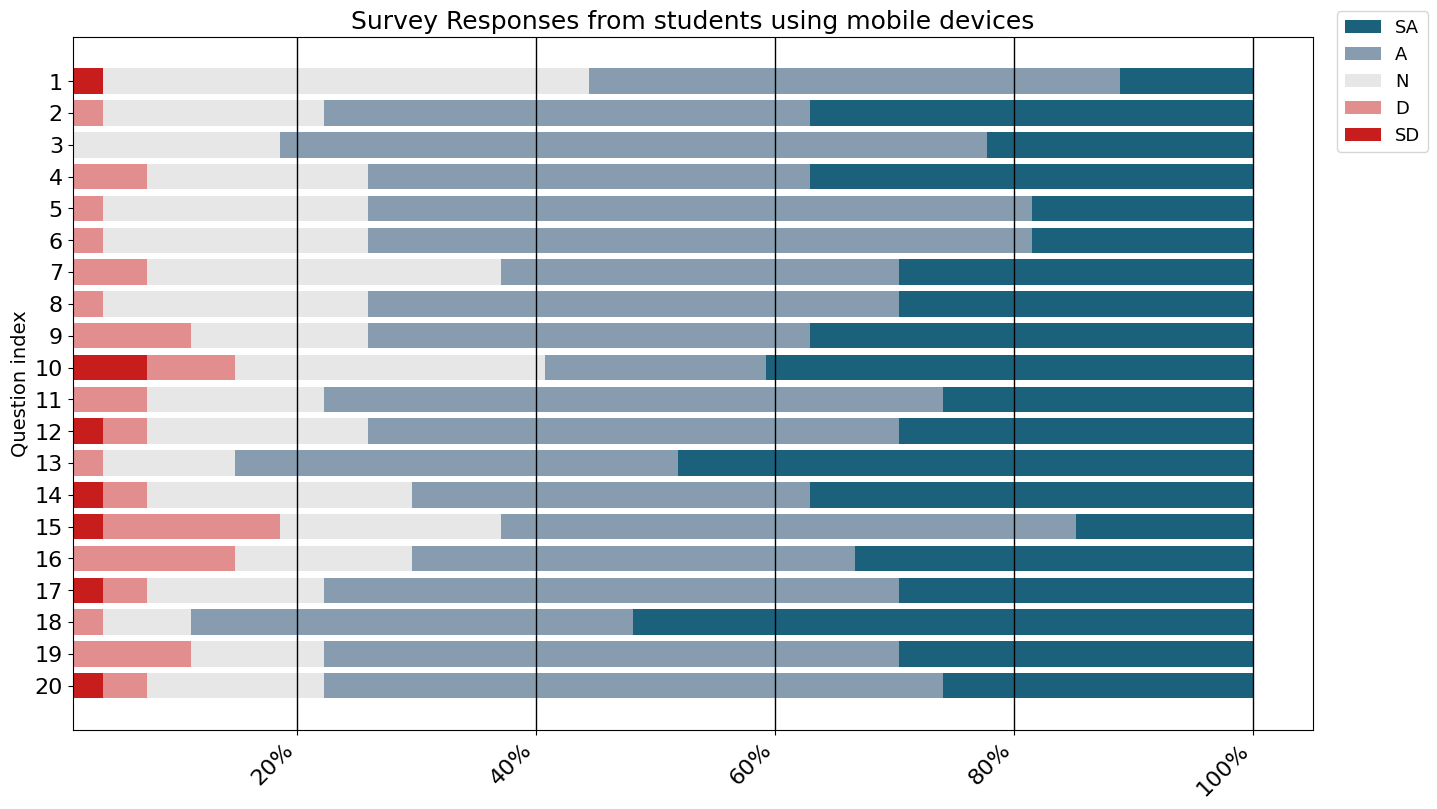

In [12]:
df_active = group_active.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_active.columns = ['SD', 'D', 'N', 'A', 'SA']
df_watchers = group_watchers.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_watchers.columns = ['SD', 'D', 'N', 'A', 'SA']
q_idx_watchers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20]

stacked_barplot_100(df_active, "Survey Responses from students using mobile devices", None, 'Survey_mobile_only')

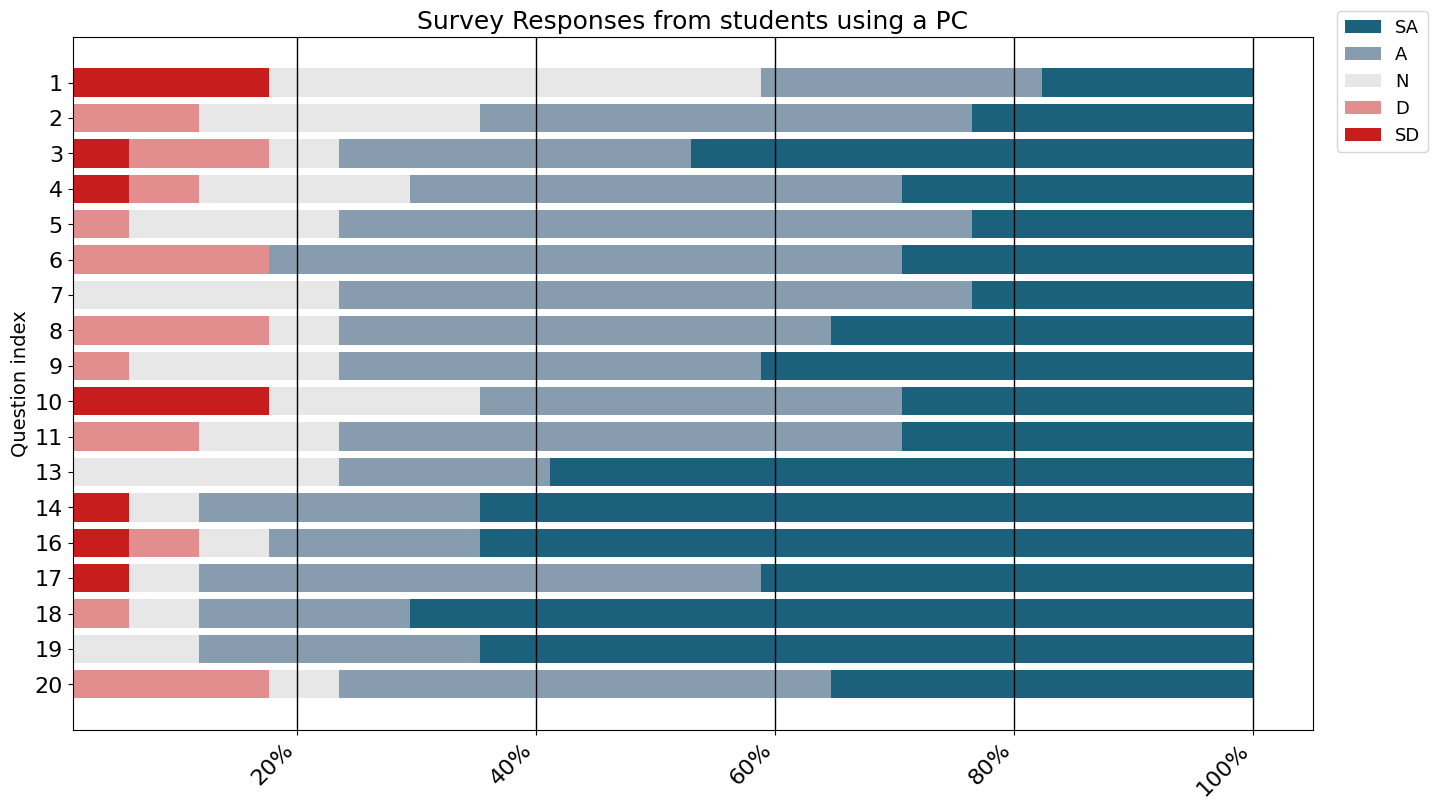

In [13]:
stacked_barplot_100(df_watchers, "Survey Responses from students using a PC", q_idx_watchers, 'Survey_PC_only')

For the users on a PC the questions 12 and 15 are missing, since these question did not appear in their questionnaire. While the trend is similar, it looks like that active users (the ones using a mobile device and experiencing AR content) answered in a slightly more positive fashion. We will have a clearer idea when plotting the mean answer. 

Now, repeat the process for the other groups. First we plot by school:

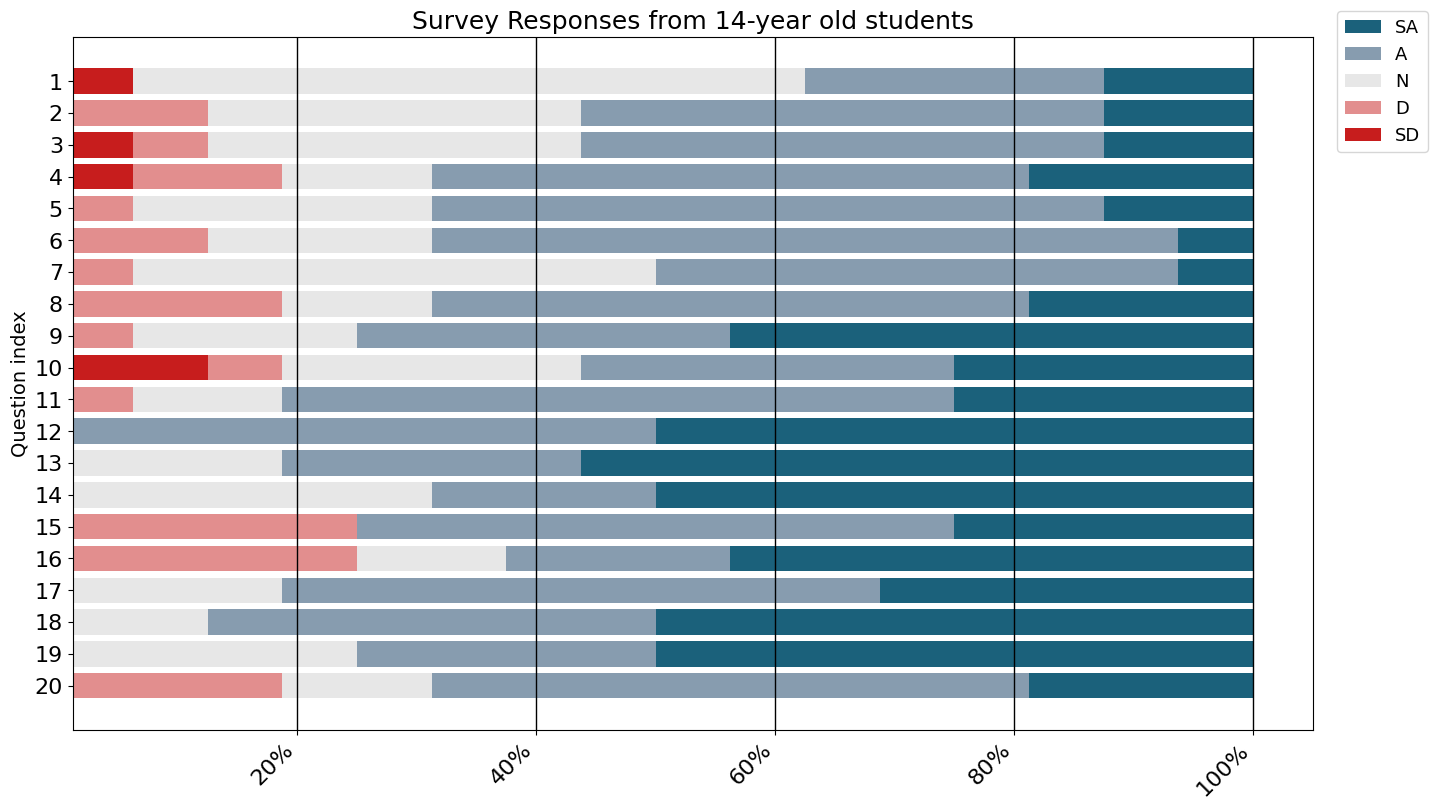

In [14]:
df_14yrs = group_14_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_14yrs.columns = ['SD', 'D', 'N', 'A', 'SA']
df_17yrs = group_17_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_17yrs.columns = ['SD', 'D', 'N', 'A', 'SA']
df_19yrs = group_19_yrs.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_19yrs.columns = ['SD', 'D', 'N', 'A', 'SA']

stacked_barplot_100(df_14yrs, "Survey Responses from 14-year old students", None, 'Survey_14_yrs')

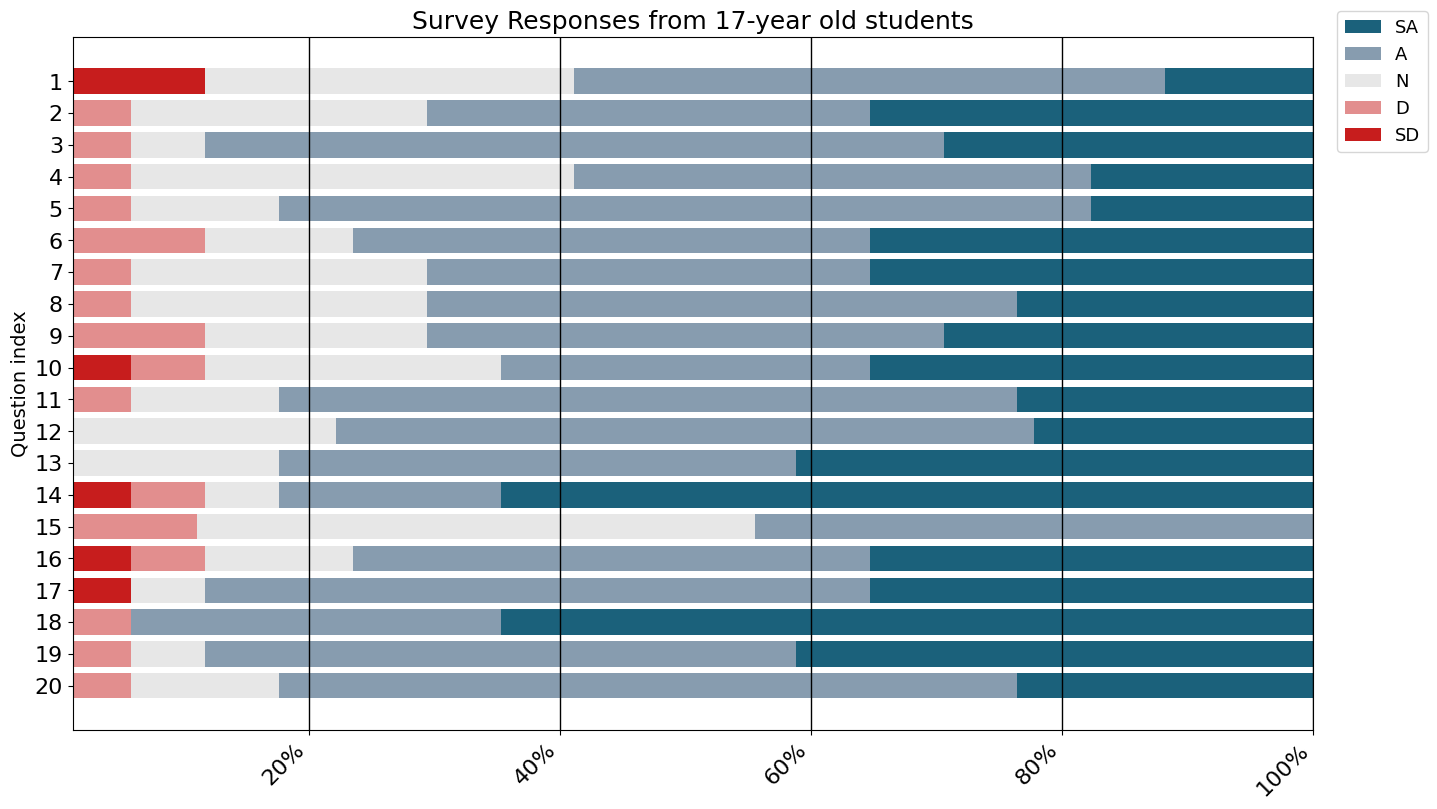

In [15]:
stacked_barplot_100(df_17yrs, "Survey Responses from 17-year old students", None, 'Survey_17_yrs')

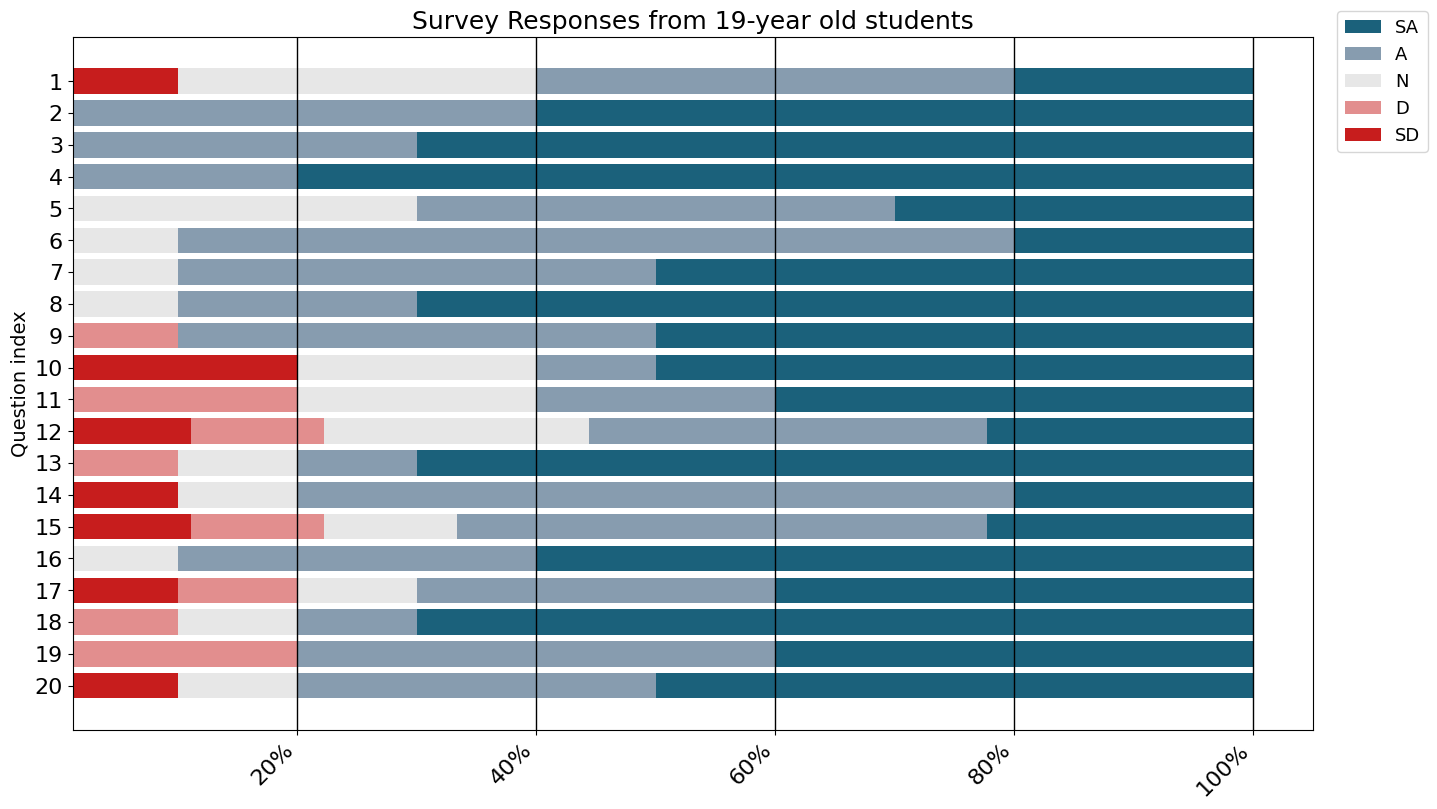

In [16]:
stacked_barplot_100(df_19yrs, "Survey Responses from 19-year old students", None, 'Survey_19_yrs')

Again, while the trend is similar, it seems that younger students enjoyed the application more.

Let's check now the results but split by question type. In this case we have filtered the data by row, so we group the results like before, but then we sum over the columns to get the aggregated results per question type:

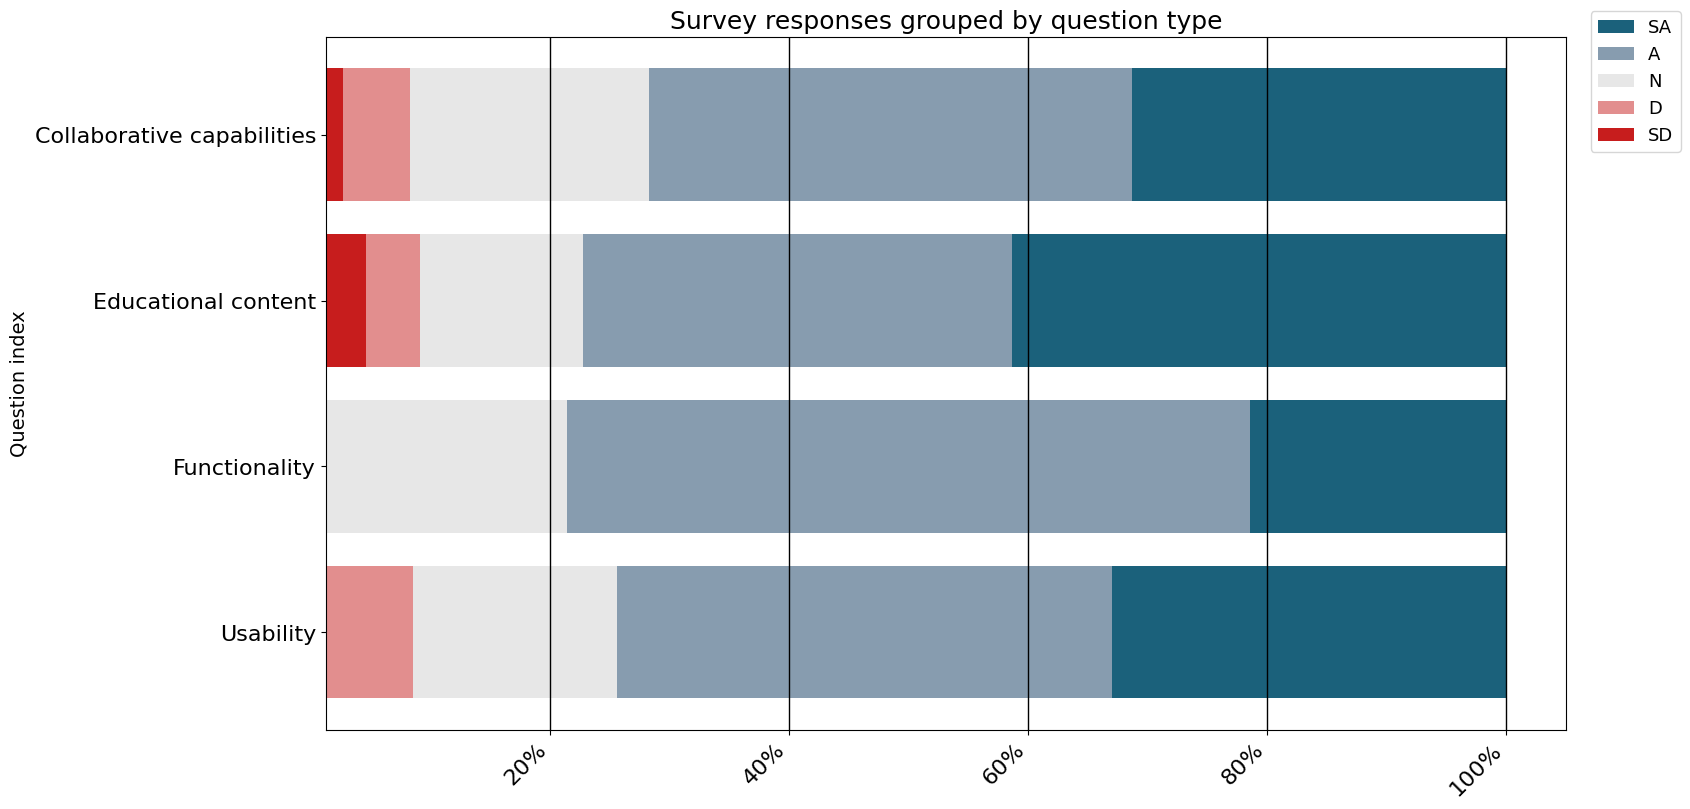

In [17]:
df_tmp = group_collab.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_collab = df_tmp.sum(axis=0)

df_tmp = group_functi.apply(pd.Series.value_counts, axis=1)[[3, 4, 5]].fillna(0)
df_tmp.columns = ['N', 'A', 'SA']
s_functi = df_tmp.sum(axis=0)
s_functi['SD'] = 0
s_functi['D'] = 0

df_tmp = group_educat.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_educat = df_tmp.sum(axis=0)

df_tmp = group_usabil.apply(pd.Series.value_counts, axis=1)[[1, 2, 3, 4, 5]].fillna(0)
df_tmp.columns = ['SD', 'D', 'N', 'A', 'SA']
s_usabil = df_tmp.sum(axis=0)

df_q_types = pd.concat([s_collab, s_functi, s_educat, s_usabil], axis=1).transpose()
df_q_types.index = ['Collaborative capabilities', 'Functionality', 'Educational content', 'Usability']
df_q_types

stacked_barplot_100(df_q_types, "Survey responses grouped by question type", df_q_types.index, 'Survey_grouped')

Let's now quickly analyse the mean and standard deviation of the score obtained per answer.

In [18]:
tmp = pd.DataFrame(columns=['Type', 'Mean', 'Sd', 'Idx'])
tmp['Type'] = q_type
tmp['Mean'] = survey_answers.mean(numeric_only=True, axis=1)
tmp['Sd'] = survey_answers.std(numeric_only=True, axis=1)
tmp['Idx'] = list(range(1,21))
questions_avg_std = tmp[["Idx", "Mean", "Sd", "Type"]]
questions_avg_std

,Idx,Mean,Sd,Type
1,1,3.454545,1.044466,Collaboration
2,2,3.977273,0.901901,Usability
3,3,4.022727,0.927328,Usability
4,4,3.954545,1.010516,Usability
5,5,3.909091,0.772136,Functionality
6,6,3.909091,0.857747,Usability
7,7,3.909091,0.857747,Usability
8,8,3.977273,0.927328,Usability
9,9,4.045455,0.963389,Usability
10,10,3.704545,1.322076,Education


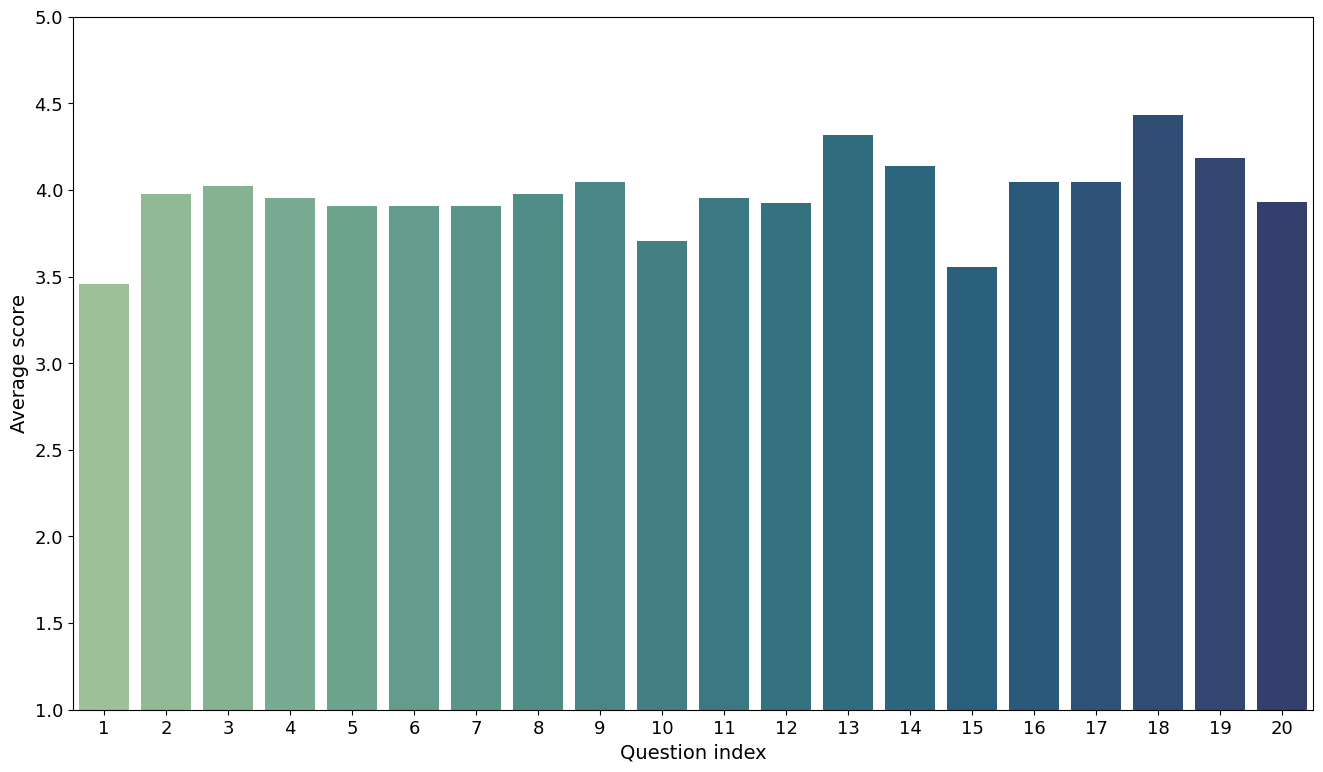

In [19]:
colors = [cmap_cont(i) for i in np.linspace(0, 1, len(questions_avg_std))]
sns.barplot(data=questions_avg_std, y='Mean', x='Idx', orient='v', palette='crest')
plt.ylabel("Average score")
plt.xlabel("Question index")
plt.ylim(1,5)
plt.savefig(img_folder / 'avg_q_score')

It is more interesting to analyze how the data are different for different groups of users. We will now plot the mean values, but differentiating the results per age and per device used. For this, we will now create a dataframe which is the transpose of the original (that is, each row contains the answers from a student and each column represents a question) and we add some new column such as age, device type, role in the test (active or watcher)

In [20]:
survey_new = survey_answers.transpose()
survey_new.columns = ['Q'+str(c) for c in list(survey_new.columns.values)]

survey_new['Mean'] = survey_new.mean(axis=1)

In [21]:
age = ['14 year-old'] * 17 + ['17 year-old'] * 17 + ['19 year-old'] * 10
survey_new["Age"] = age

def rem_digit(s):
    return "".join(filter(lambda x: not x.isdigit(), s))

survey_new["Device"] = survey_new.apply(lambda row: rem_digit(row.name), axis=1)

def set_user_type(s):
    if s.startswith(("PC")):
        return 'Watcher'
    else:
        return 'Active'
        
survey_new["User type"] = survey_new.apply(lambda row: set_user_type(row.Device), axis=1)
survey_new.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Mean,Age,Device,User type
iPad1,3,4,4,5,5,5,4,4,3,5,4,3,4,4,4,5,4,4,4,5,4.15,14 year-old,iPad,Active
iPad2,3,4,3,4,4,4,4,3,4,2,4,4,4,5,4,5,5,5,5,4,4.00,14 year-old,iPad,Active
Tablet1,4,5,4,3,4,3,4,4,5,5,4,5,5,3,4,4,4,5,5,4,4.20,14 year-old,Tablet,Active


Let's plot the average score per user, and then split the results according to different groups:

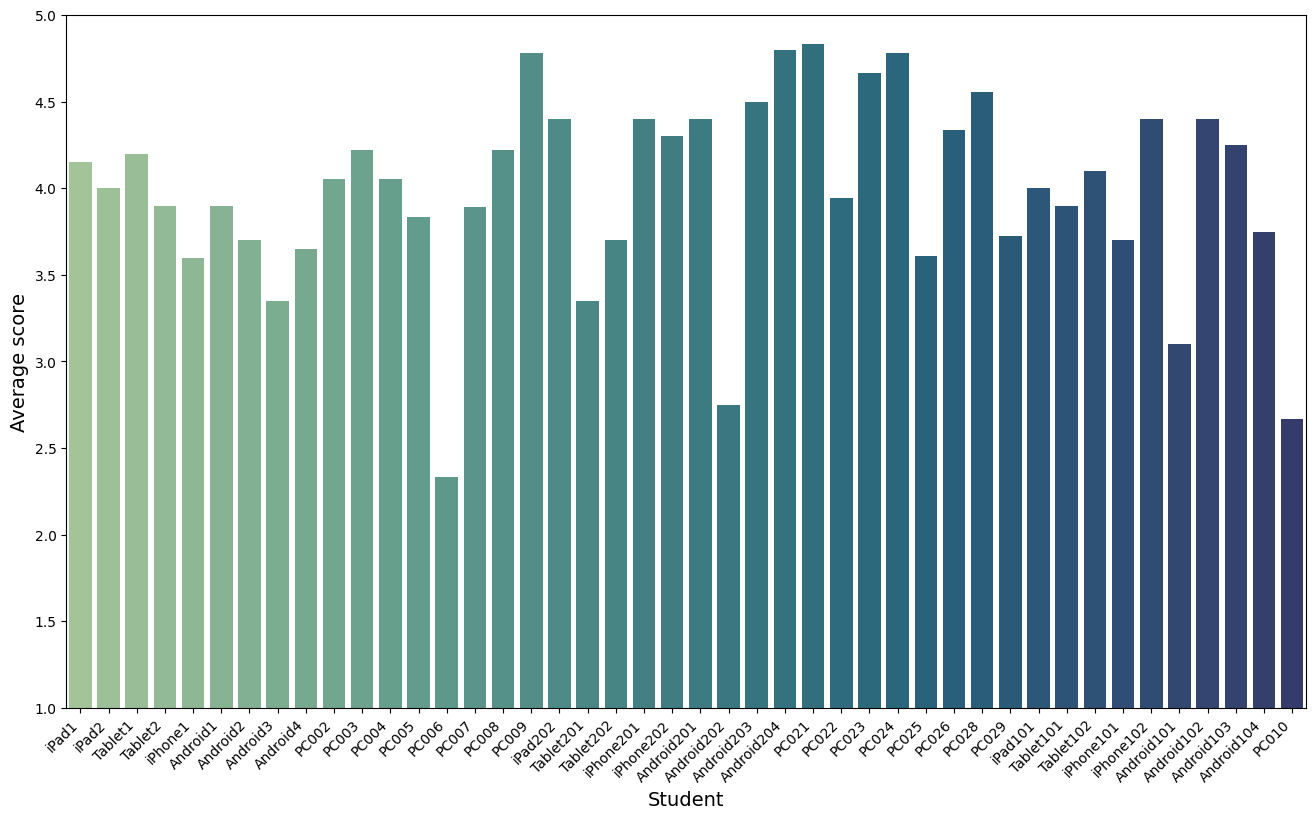

In [22]:
colors = [cmap_cont(i) for i in np.linspace(0, 1, len(survey_new.index))]
sns.barplot(data=survey_new, y='Mean', x=survey_new.index, orient='v', palette='crest')
plt.ylabel("Average score")
plt.xlabel("Student")
plt.ylim(1,5)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_facecolor('white')
plt.tick_params(labelsize=10)
plt.savefig(img_folder / 'avg_q_score_student')

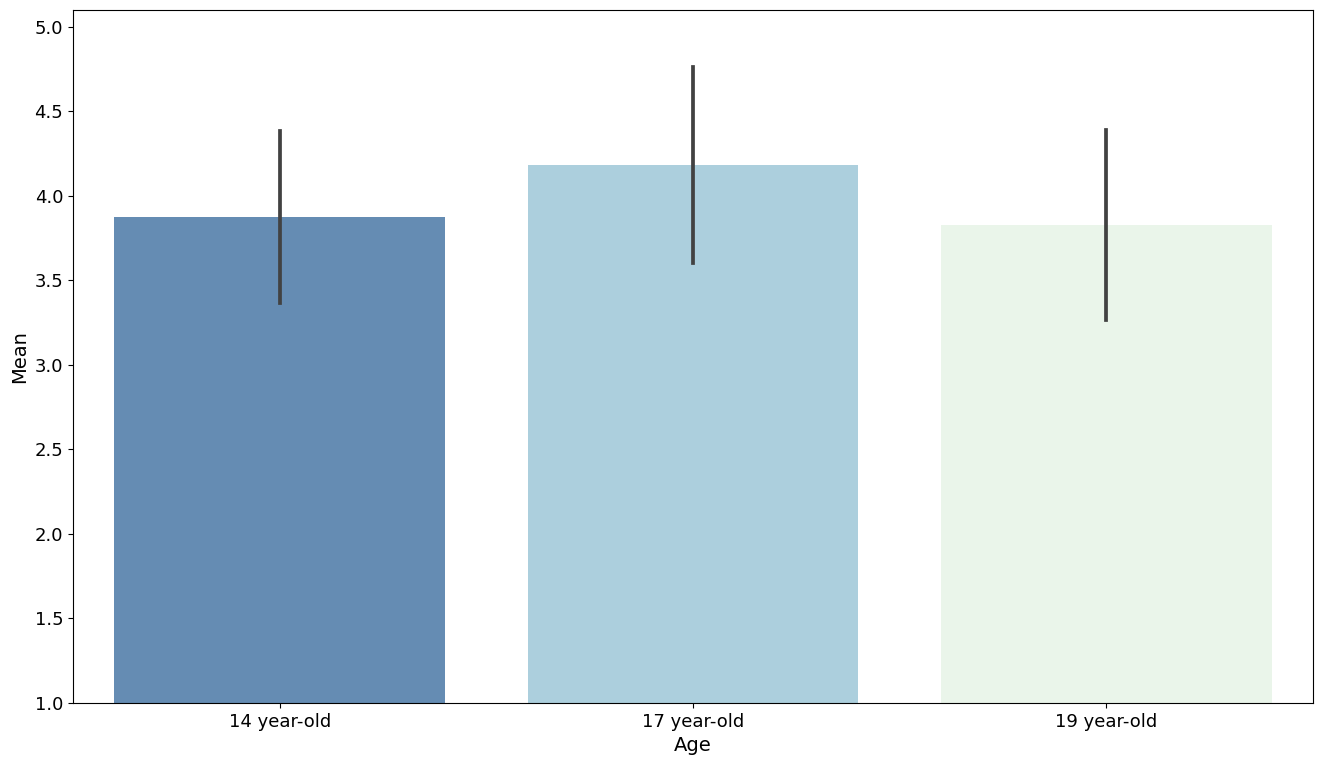

In [23]:
g = sns.barplot(data=survey_new, y="Mean", x="Age", errorbar='sd',
                orient='v', palette=cmap_disc)
g.set(ylim=(1,5.1))
plt.savefig(img_folder / 'avg_q_score_age')

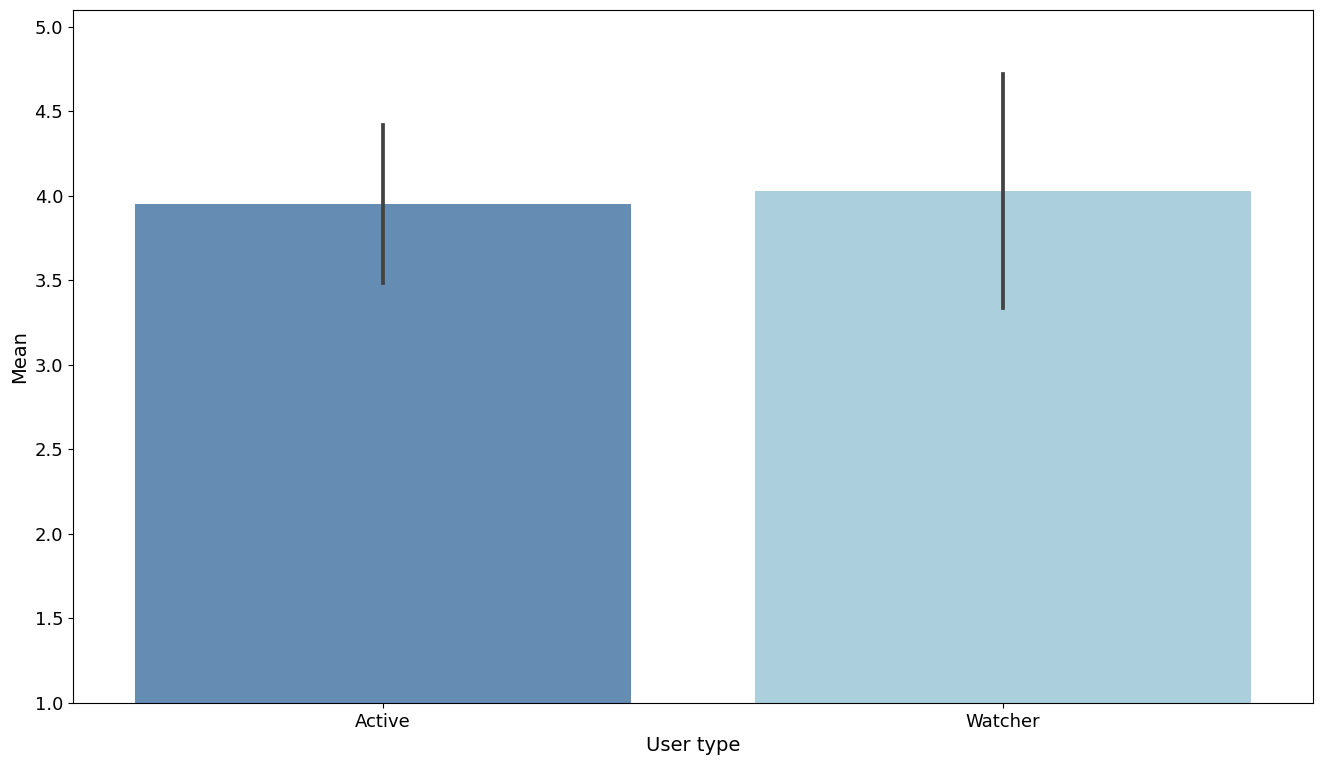

In [24]:
g = sns.barplot(data=survey_new, y="Mean", x="User type", errorbar='sd',
                orient='v', palette=cmap_disc)
g.set(ylim=(1,5.1))
plt.savefig(img_folder / 'avg_q_score_usertype')

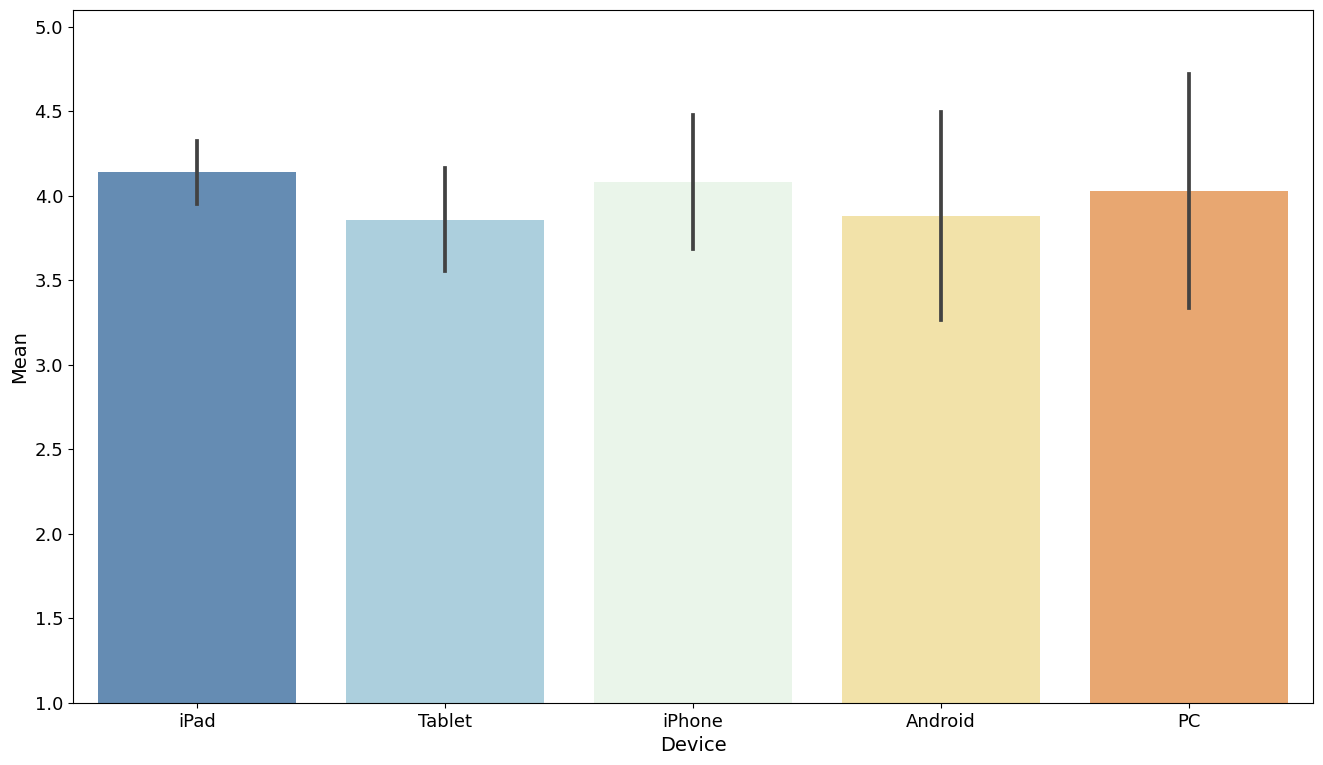

In [25]:
g = sns.barplot(data=survey_new, y="Mean", x="Device", errorbar='sd',
                orient='v', palette=cmap_disc)
g.set(ylim=(1,5.1))
plt.savefig(img_folder / 'avg_q_score_device')

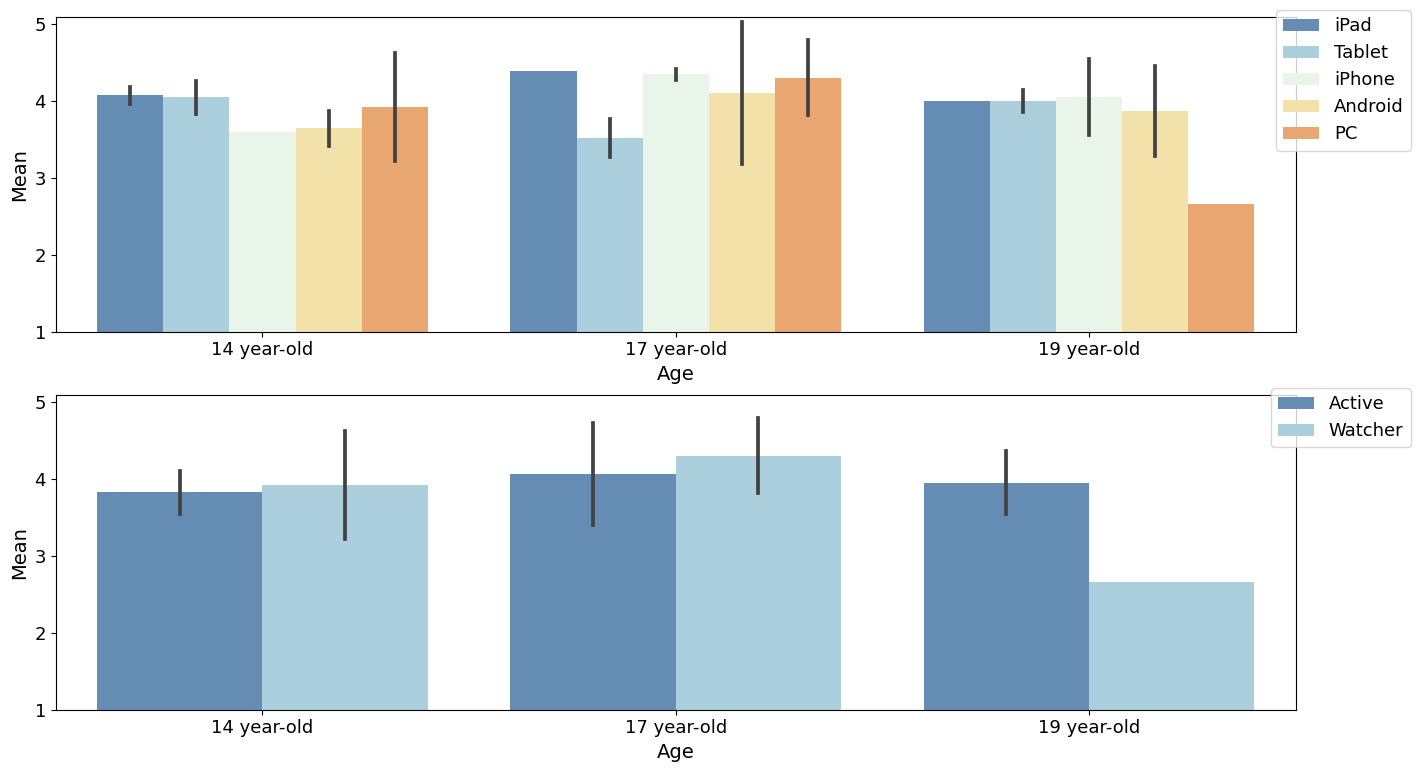

In [26]:
fig, ax = plt.subplots(2, 1)

g = sns.barplot(data=survey_new, y="Mean", x="Age", hue="Device", errorbar='sd',
                orient='v', palette=cmap_disc, ax=ax[0])
g.set(ylim=(1,5.1))
g.legend(bbox_to_anchor=(1.1, 1.05))

g = sns.barplot(data=survey_new, y="Mean", x="Age", hue="User type", errorbar='sd',
                orient='v', palette=cmap_disc, ax=ax[1])
g.set(ylim=(1,5.1))
g.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig(img_folder / 'avg_q_score_age_device_type')

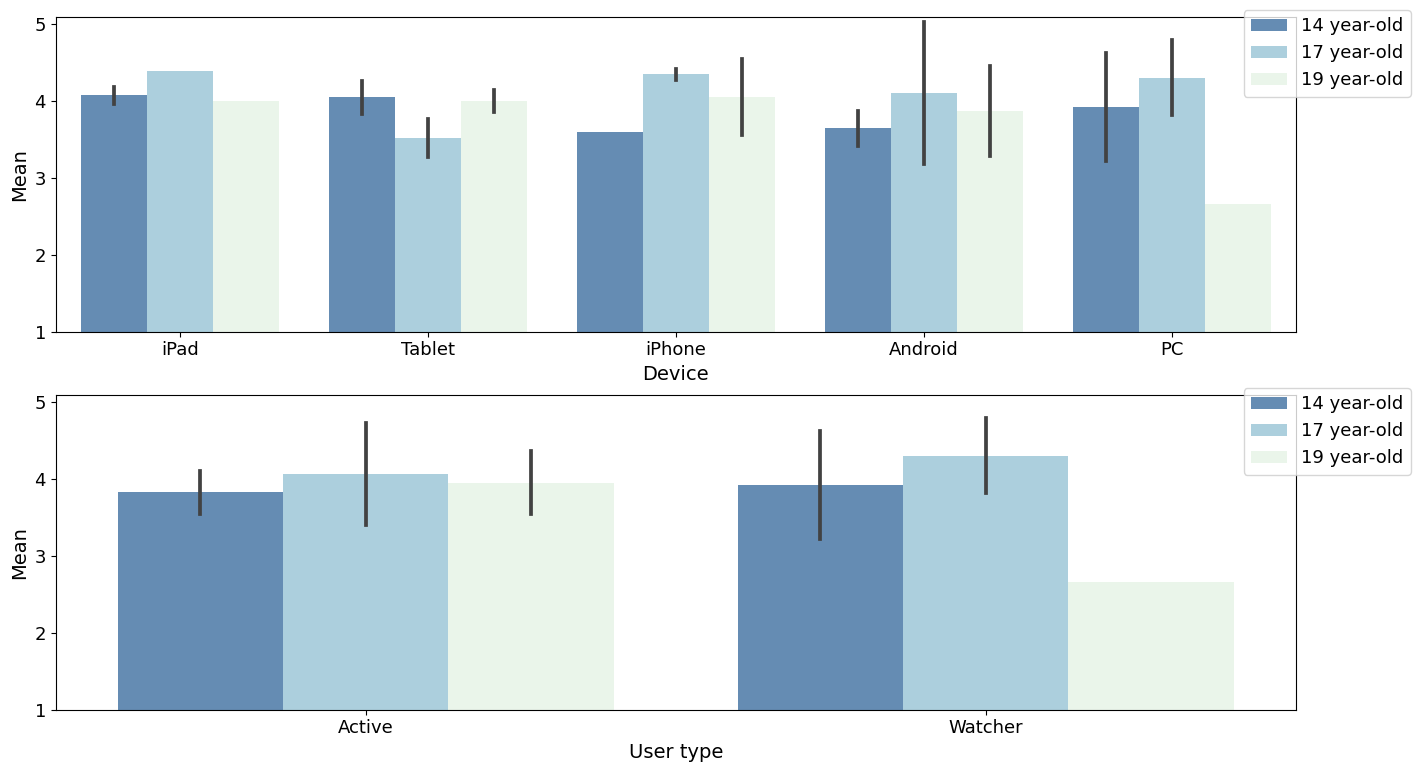

In [27]:
fig, ax = plt.subplots(2, 1)

g = sns.barplot(data=survey_new, y="Mean", x="Device", hue="Age", errorbar='sd',
                orient='v', palette=cmap_disc, ax=ax[0])
g.set(ylim=(1,5.1))
g.legend(bbox_to_anchor=(1.1, 1.05))

g = sns.barplot(data=survey_new, y="Mean", x="User type", hue="Age", errorbar='sd',
                orient='v', palette=cmap_disc, ax=ax[1])
g.set(ylim=(1,5.1))
g.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig(img_folder / 'avg_q_score_age_device_type_2')

## xAPI statements analysis

Let's analyze now the xAPI statements collected automatically through the application. We have to combine the data from the three csv files exported from LearningLocker.

In [28]:
salesianos_xapi = pd.read_csv('statements_salesianos_clean.csv', index_col=0).reset_index(drop=True)
zubiri_xapi = pd.read_csv('statements_xubiri_clean.csv', index_col=0).reset_index(drop=True)
deusto_xapi = pd.read_csv('statements_deusto_clean.csv', index_col=0).reset_index(drop=True)

Let's clean the dataset before merging them. We will remove the interactions with the wrong username and rename the usernames to match the names used by students when filling the questionnaire. This way we will be able to match the results of the questionnaire with the user data from the app.

In [29]:
# Remove Android3 as the app was not working on that device
a = ["Nuria", "Eider", "Janire", "Lucia", "unai", "Android3"]  
salesianos_xapi = salesianos_xapi[~salesianos_xapi['actor'].isin(a)]
salesianos_xapi = salesianos_xapi.replace({"actor": {"Iphone 1": "iPhone1",
                                                     "iphone 1": "iPhone1",
                                                     "Ipad1": "iPad1",
                                                     "Ipad2": "iPad2"}})
salesianos_xapi["actor"] = salesianos_xapi["actor"].str.replace(" ","")
print(f'List of users for the test in Salesianos school: {salesianos_xapi["actor"].unique()}')

a = ["holshola", "mario"]
zubiri_xapi = zubiri_xapi[~zubiri_xapi['actor'].isin(a)]
zubiri_xapi = zubiri_xapi.replace({"actor": {"Iphone202": "iPhone202",
                                             "IPhone202": "iPhone202",
                                             "android203": "Android203"}})
print(f'List of users for the test in Zubiri Manteo school: {zubiri_xapi["actor"].unique()}')

deusto_xapi = deusto_xapi.replace({"actor": {"Iphone 101": "iPhone101",
                                   "Iphone101": "iPhone101",
                                   "AR4Education": "Android103",
                                   "pc010": "PC010",
                                   "iphone102": "iPhone102"}})
print(f'List of users for the test in Deusto school: {deusto_xapi["actor"].unique()}')

List of users for the test in Salesianos school: ['Teacher' 'PC006' 'PC008' 'Tablet1' 'PC004' 'PC009' 'PC007' 'PC003'
 'iPhone1' 'PC005' 'iPad2' 'Tablet2' 'Android1' 'Android2' 'iPad1' 'PC002'
 'Android4']
List of users for the test in Zubiri Manteo school: ['Android201' 'Teacher' 'Android203' 'Android202' 'Android204' 'Tablet202'
 'PC028' 'iPhone201' 'iPhone202' 'Tablet201' 'iPad202' 'PC025' 'PC029'
 'PC024' 'PC023' 'PC026' 'PC022' 'PC021' 'PC011']
List of users for the test in Deusto school: ['Android102' 'Android101' 'Tablet101' 'iPad101' 'Android104' 'Tablet102'
 'Teacher' 'iPhone102' 'Android103' 'iPhone101' 'PC010']


In [30]:
all_xapi = pd.concat([salesianos_xapi, zubiri_xapi, deusto_xapi], axis=0)
all_xapi.head(2)

,timestamp,stored,actor,verb,object,result
5,2023-03-10 11:45:09.638000+00:00,2023-03-10T11:45:09.638Z,Teacher,Logged In,Salesianos,NaN
6,2023-03-10 11:52:00.020000+00:00,2023-03-10T11:52:00.020Z,PC006,Logged In,Salesianos,NaN


We won't count "Logged In" or "Logged Out" as interactions, since they do not contribute to the real use of the app:

In [31]:
actions = ["Logged In", "Logged Out"]
students_app_interactions = all_xapi[~all_xapi['verb'].isin(actions)]
students_app_interactions["verb"].unique()

array(['Placed', 'Swiped', 'Asked', 'Started', 'Accepted', 'Set Turn',
       'Suggested', 'Ran Out', 'Sent', 'Checked', 'Assigned', 'Canceled',
       'Ended'], dtype=object)

#### 1) Student interactions with the app (and how they correlate with the survey answers)

In [32]:
interactions = students_app_interactions.groupby(['actor'])["verb"].agg(['count']).sort_values("count")

We expect that students who were in the role of *watchers*, that is the one using a PC, have significant less interactions, as they could only provide suggestions to other students, and they could not answer to the questions of the quiz or use the AR functionalities of the application.

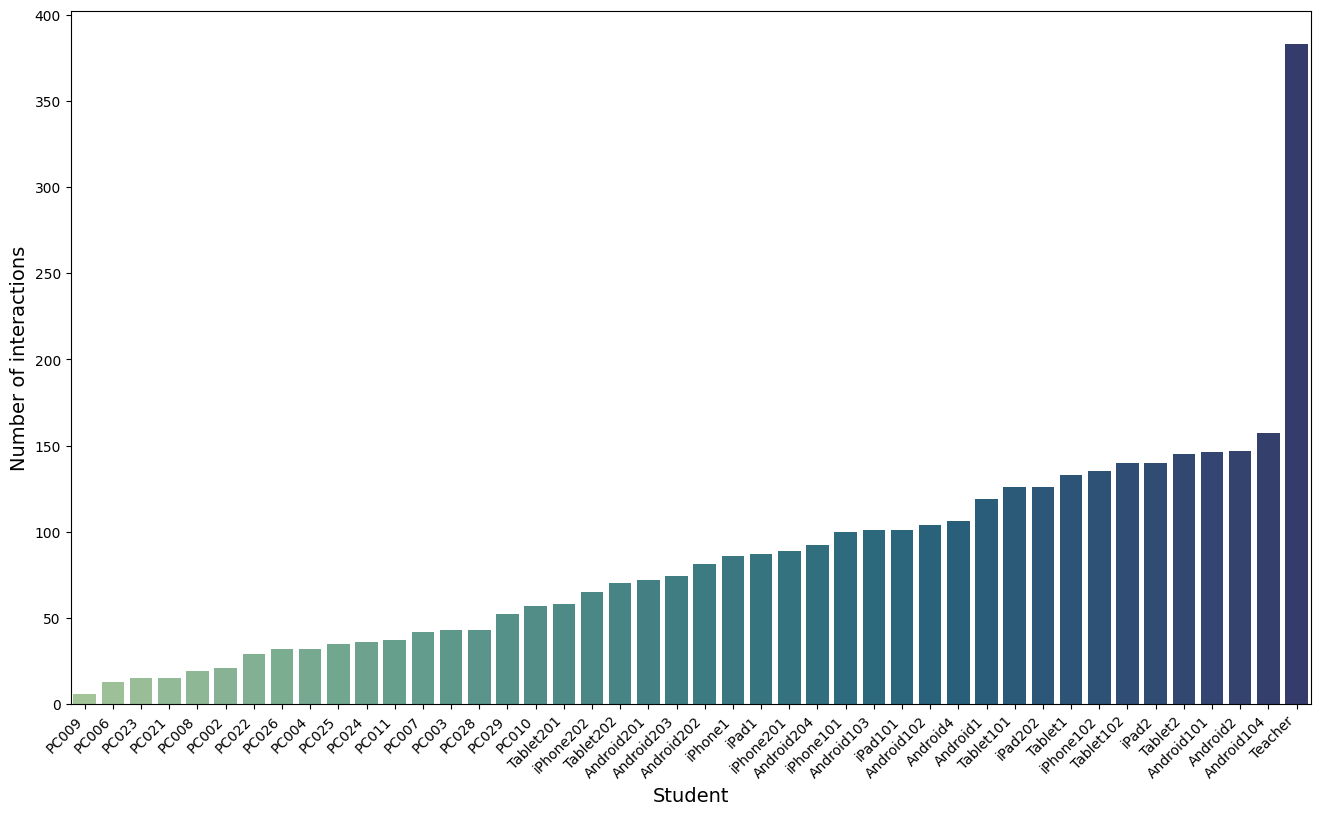

In [33]:
sns.barplot(data=interactions, y='count', x=interactions.index, orient='v', palette='crest')
plt.ylabel("Number of interactions")
plt.xlabel("Student")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

As expected, all the *watchers* have less interactions than *active* users. The *Teacher* has by far the most interactions, but those were all generated automatically by the app, since the process of sending question, assign a score to each answer and choosing the next student were done in a automatic fashion. What's more, the *Teacher* is the only role who repeated across trials, so the count here is across the three tests. Let's remove the teacher and plot the interactions again:

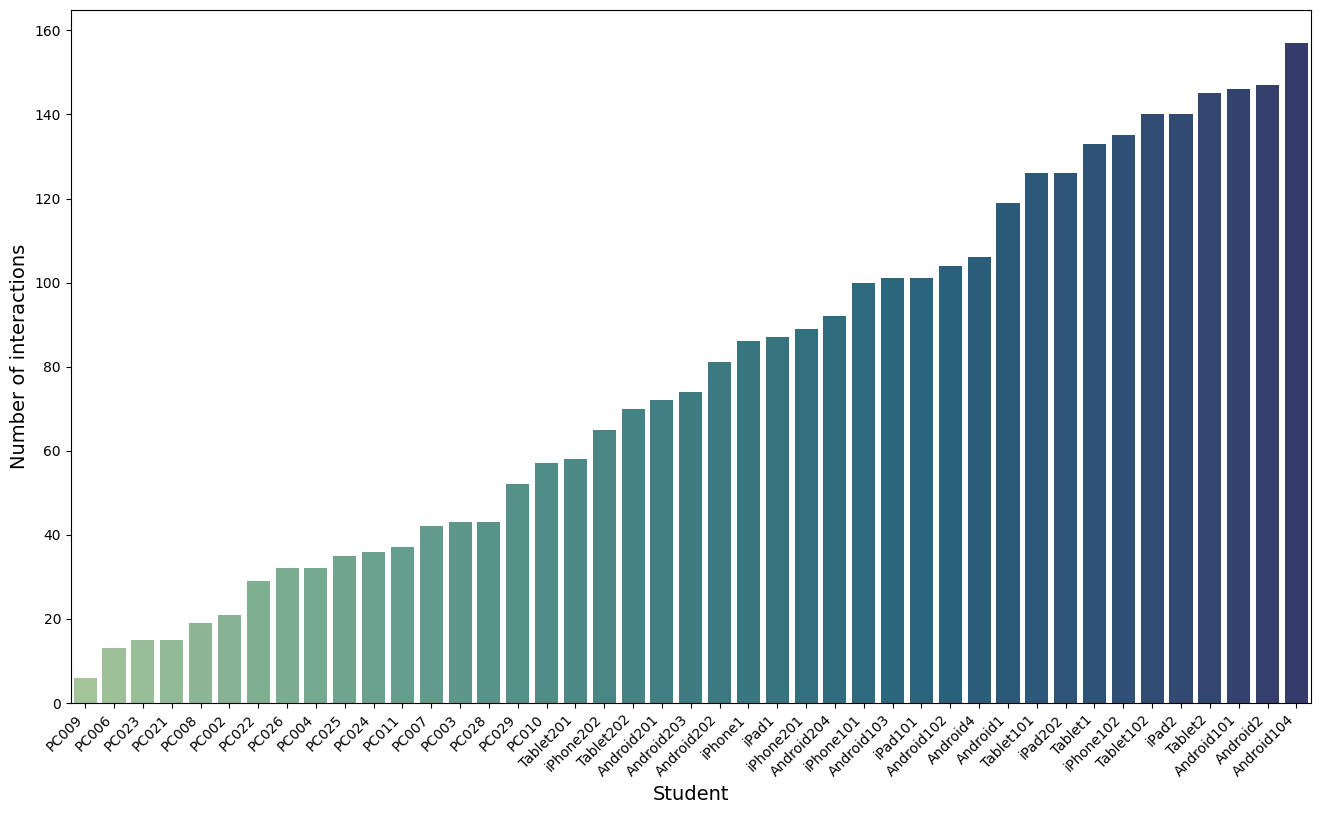

In [34]:
interactions = interactions.drop('Teacher')

sns.barplot(data=interactions, y='count', x=interactions.index, orient='v', palette='crest')
plt.ylabel("Number of interactions")
plt.xlabel("Student")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_facecolor('white')
plt.tick_params(labelsize=10)
plt.savefig(img_folder / 'num_interactions')

The interesting aspect to analyse is whether there is any correlation between the number of interactions for each student and the answers they have given to the survey questions. We will follow two statistical approaches:

1) **Correlation analysis**: We will investigate whether there is a correlation between the number of interactions and the average scores given to the questions by the students. To do this, we will calculate the Pearson correlation coefficient and the corresponding p-value. The Pearson correlation coefficient measures the strength and direction of the linear relationship between the interactions and the scores, and the p-value indicates whether this relationship is statistically significant. If the p-value is below a significance level of 0.05, we can conclude that there is evidence of a significant correlation between the interactions and the survey scores.

2) **Hypothesis testing**: We will also perform a hypothesis test to investigate whether the survey answers given by students who had a high number of interactions are significantly different from the survey answers given by students who had a low number of interactions. We will perform a two-sample t-test assuming equal variances, which returns the t-statistic and the corresponding p-value. As in the previous analysis, if the p-value is below 0.05, we can conclude that there is evidence of a significant difference in survey answers between the two groups.

Since the interactions between the *watchers* (students on a PC) and *active* (students on a mobile device) users are significantly different, we will also perform the analysis for the PC dataset and the mobile dataset separately.


In [35]:
interactions = interactions.reset_index()
student_list = survey_new['Mean'].reset_index()
student_list.rename(columns={"index": "Student"}, inplace=True)

In [36]:
mobile_list = student_list[student_list["Student"].str.startswith(("Android", "iPhone", "iPad", "Tablet"))]
pc_list = student_list[student_list["Student"].str.startswith(("PC"))]

In [37]:
int_df = student_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_pc_df = pc_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)
int_mobile_df = mobile_list.merge(interactions, left_on="Student", right_on="actor").drop("actor", axis=1)

In [38]:
from scipy.stats import ttest_ind, pearsonr

high_interactions = int_df["Mean"][int_df["count"] >= int_df["count"].mean()]
low_interactions = int_df["Mean"][int_df["count"] < int_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_df["count"], int_df["Mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.5063182832094194
P-value: 0.615412707444693

Pearson correlation coefficient: -0.11371060650016485
P-value: 0.47336163956268346


In [39]:
high_interactions = int_mobile_df["Mean"][int_mobile_df["count"] >= int_mobile_df["count"].mean()]
low_interactions = int_mobile_df["Mean"][int_mobile_df["count"] < int_mobile_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_mobile_df["count"], int_mobile_df["Mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.29843859536657763
P-value: 0.7679370544701799

Pearson correlation coefficient: -0.060131363781654644
P-value: 0.7704429581178198


In [40]:
high_interactions = int_pc_df["Mean"][int_pc_df["count"] >= int_pc_df["count"].mean()]
low_interactions = int_pc_df["Mean"][int_pc_df["count"] < int_pc_df["count"].mean()]

t_stat, p_value = ttest_ind(high_interactions, low_interactions)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_pc_df["count"], int_pc_df["Mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.3712121842436294
P-value: 0.7160367243263037

Pearson correlation coefficient: -0.29050233285635907
P-value: 0.27505038362052336


Since none of the p-values are below the significance level of 0.05 we have set and the correlation coefficients are very close to 0, we can conclude that there is no significant relationship between the number of interactions and the average survey answers of the students. Let's show the linear relationship on a scatterplot

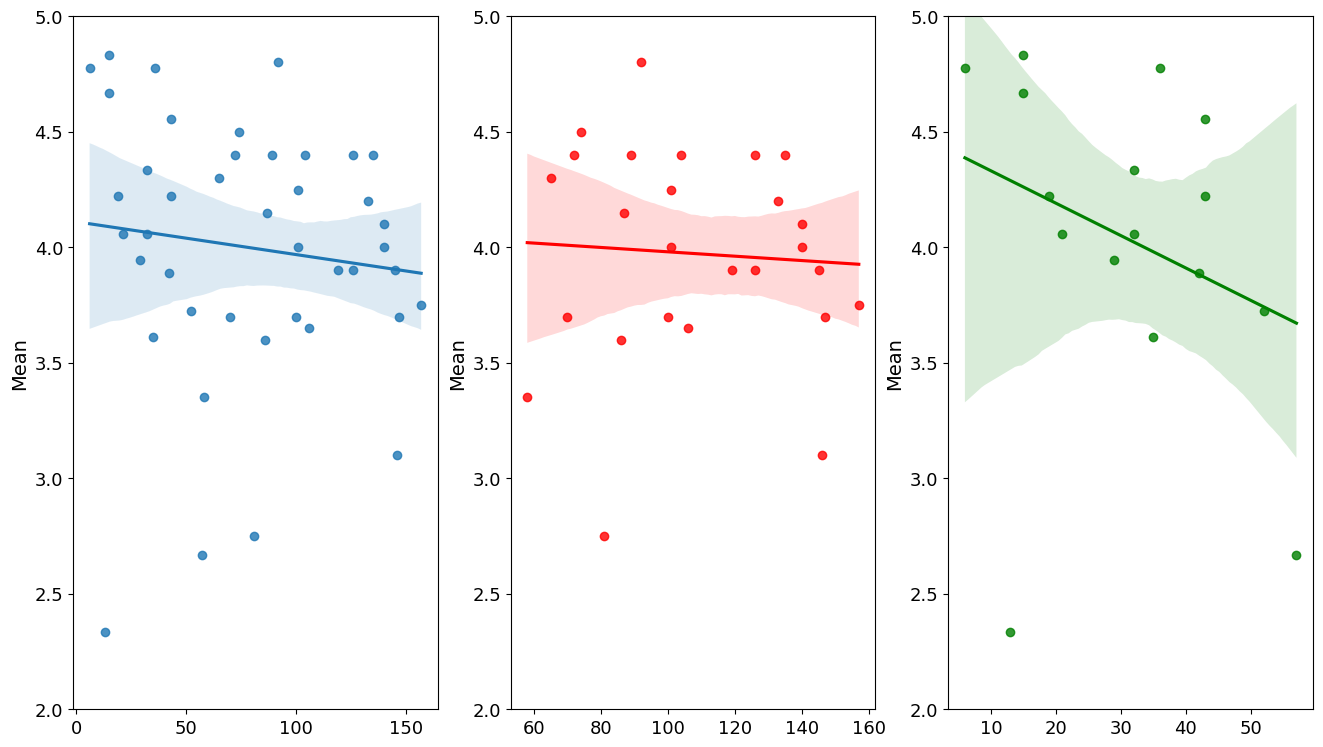

In [41]:
f, axes = plt.subplots(1, 3)

sns.regplot(x="count", y="Mean", data=int_df, ax=axes[0]);
axes[0].set(xlabel=None) 
sns.regplot(x="count", y="Mean", data=int_mobile_df, ax=axes[1], color='red', line_kws={'color': 'red'});
axes[1].set(xlabel=None) 
sns.regplot(x="count", y="Mean", data=int_pc_df, ax=axes[2], color='green', line_kws={'color': 'green'});
axes[2].set(xlabel=None) 
#axes[0].set_xlim([10, 120])
axes[0].set_ylim([2, 5])
#axes[1].set_xlim([50, 120])
axes[1].set_ylim([2, 5])
#axes[2].set_xlim([10, 60])
axes[2].set_ylim([2, 5])
plt.savefig(img_folder / 'mean_all_mobile_pc_vs_interactions')

#### 2) **Active users** - Students' grades

When the *active users* (students using a mobile device and receiving questions from the app) submit an answer, the app assigns them a grade, which can be found in the "Assigned" action. We will study whether there is correlation between the grade the students have obtained and their answers to the survey.

In [42]:
df = all_xapi[(all_xapi["actor"]=="Teacher") & (all_xapi["verb"]=="Assigned")]
df.head()

,timestamp,stored,actor,verb,object,result
321,2023-03-10 12:04:36.832000+00:00,2023-03-10T12:04:36.832Z,Teacher,Assigned,7.72;iPhone_1,NaN
373,2023-03-10 12:05:37.368000+00:00,2023-03-10T12:05:37.368Z,Teacher,Assigned,8.15;Android2,NaN
402,2023-03-10 12:06:24.752000+00:00,2023-03-10T12:06:24.752Z,Teacher,Assigned,7.72;Tablet1,NaN
546,2023-03-10 12:11:20.420000+00:00,2023-03-10T12:11:20.420Z,Teacher,Assigned,7.45;Tablet_2,NaN
587,2023-03-10 12:12:12.001000+00:00,2023-03-10T12:12:12.001Z,Teacher,Assigned,7.72;iPad2,NaN


In the above dataframe we can see where the grades are stored. We need to extract them and clean the user names.

In [43]:
grades = pd.DataFrame(df["object"].str.split(";", expand=True))
grades.columns = ["Score", "Student"]
grades.head()

,Score,Student
321,7.72,iPhone_1
373,8.15,Android2
402,7.72,Tablet1
546,7.45,Tablet_2
587,7.72,iPad2


In [44]:
grades["Score"] = grades["Score"].astype("float")
grades = grades.groupby('Student', as_index=False)['Score'].mean().sort_values("Score")

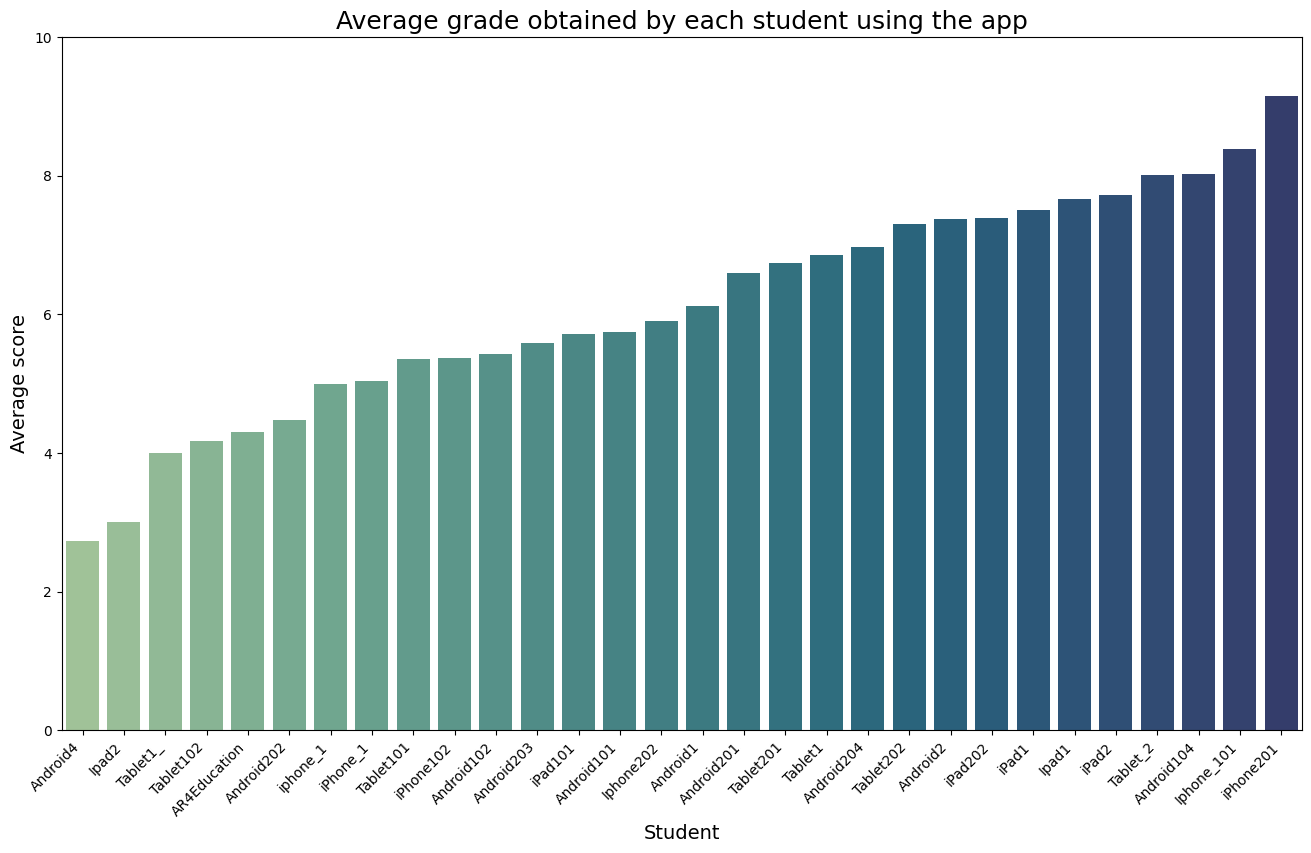

In [45]:
sns.barplot(data=grades, y='Score', x='Student', orient='v', palette='crest')
plt.title('Average grade obtained by each student using the app')
plt.ylabel("Average score")
plt.xlabel("Student")
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_facecolor('white')
plt.ylim(0, 10)
plt.tick_params(labelsize=10)
plt.savefig(img_folder / 'student_score')

We will now perform the same analysis as in the previous section with the survey answers to see if there is correlation between the survey answers and the grades obtained.

In [46]:
grade_df = student_list.merge(grades, left_on="Student", right_on="Student")
grade_df.head(3)

,Student,Mean,Score
0,iPad1,4.15,7.50
1,iPad2,4.00,7.72
2,Tablet1,4.20,6.86


In [47]:
high_grade = grade_df["Mean"][grade_df["Score"] >= grade_df["Score"].mean()]
low_grade = grade_df["Mean"][grade_df["Score"] < grade_df["Score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(grade_df["Score"], grade_df["Mean"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.953006398730349
P-value: 0.3525546309185852

Pearson correlation coefficient: 0.27553882521336237
P-value: 0.22668801730770272


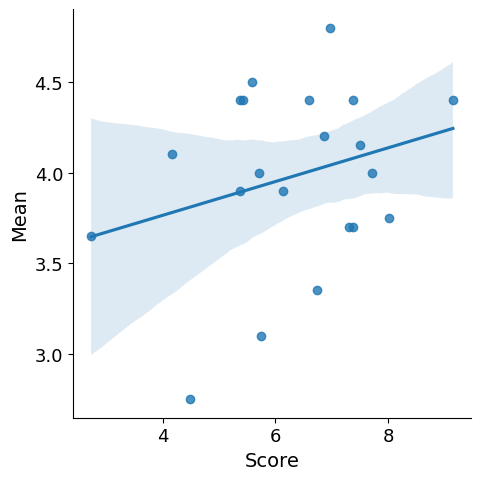

In [48]:
sns.lmplot(x="Score", y="Mean", data=grade_df);

There seem to be a correlation between the variables, but without a p-value below the significance threshold.
Another interesting focus point would be to study the correlation between the number of interactions by the mobile-only students and the grades they've obtained:

In [49]:
int_grade_df = interactions.merge(grades, left_on="actor", right_on="Student").drop("Student", axis=1)
int_grade_df.head(3)

,actor,count,Score
0,Tablet201,58,6.735
1,Tablet202,70,7.300
2,Android201,72,6.600


In [50]:
high_grade = int_grade_df["count"][int_grade_df["Score"] >= int_grade_df["Score"].mean()]
low_grade = int_grade_df["count"][int_grade_df["Score"] < int_grade_df["Score"].mean()]

t_stat, p_value = ttest_ind(high_grade, low_grade)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(int_grade_df["Score"], int_grade_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: -0.5088044707659332
P-value: 0.6167468678465822

Pearson correlation coefficient: 2.4102820336286527e-05
P-value: 0.9999172681085954


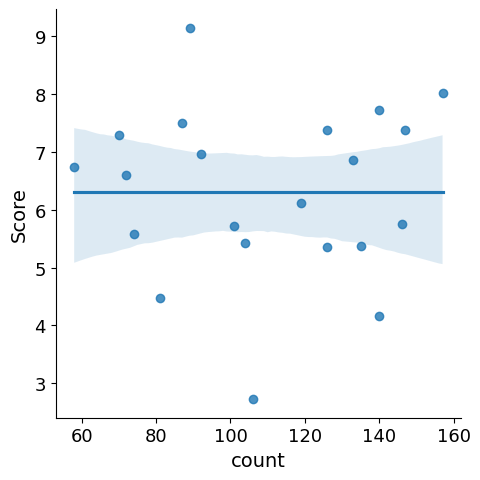

In [51]:
sns.lmplot(x="count", y="Score", data=int_grade_df);

And in this case, again we cannot find any meaningful correlations in the data.

#### 3) Accepted suggestions

Let's have a look if the suggestions sent by the users were accepted from the students when answering the questions:

In [52]:
accepted_suggestions = students_app_interactions[students_app_interactions["verb"]=="Accepted"]

In [53]:
accepted = accepted_suggestions.groupby(['actor'])["verb"].agg(['count']).sort_values("count").reset_index()
accepted.head()

,actor,count
0,Android1,2
1,iPhone101,3
2,iPhone1,3
3,iPad202,3
4,iPad1,3


We will perform the same analysis as before, first with the survey answers:

In [54]:
accepted_df = student_list.merge(accepted, left_on="Student", right_on="actor").drop("actor", axis=1)
accepted_df

,Student,Mean,count
0,iPad1,4.15,3
1,iPad2,4.00,4
2,Tablet1,4.20,4
3,Tablet2,3.90,4
4,iPhone1,3.60,3
5,Android1,3.90,2
6,Android2,3.70,4
7,Android4,3.65,4
8,iPad202,4.40,3
9,Tablet201,3.35,3


In [55]:
high_accepted = accepted_df["count"][accepted_df["Mean"] >= accepted_df["Mean"].mean()]
low_accepted = accepted_df["count"][accepted_df["Mean"] < accepted_df["Mean"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_df["Mean"], accepted_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.509027810380622
P-value: 0.6153809157159337

Pearson correlation coefficient: 0.01895425111393027
P-value: 0.9267752560896472


This test shows us that there is no clear correlation in this case. Let's check with the grades:

In [56]:
accepted_grades_df = grades.merge(accepted, left_on="Student", right_on="actor").drop("actor", axis=1)
accepted_grades_df.head()

,Student,Score,count
0,Android4,2.726667,4
1,Tablet102,4.166667,4
2,Android202,4.476667,3
3,Tablet101,5.362500,4
4,iPhone102,5.366667,4


In [57]:
high_accepted = accepted_df["count"][accepted_df["Mean"] >= accepted_df["Mean"].mean()]
low_accepted = accepted_df["count"][accepted_df["Mean"] < accepted_df["Mean"].mean()]

t_stat, p_value = ttest_ind(high_accepted, low_accepted)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(accepted_df["Mean"], accepted_df["count"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.509027810380622
P-value: 0.6153809157159337

Pearson correlation coefficient: 0.01895425111393027
P-value: 0.9267752560896472


There is no correlation in this case either.

### 4) Time left in students' answer.

Our final step in the analysis will focus on the time left for the students. Each student had 40 seconds to answer a question, after he accepted the request from the app.
We will analyse its correlation with the grades.

In [58]:
time_left = students_app_interactions[students_app_interactions["verb"]=="Sent"]
time_left.head()

,timestamp,stored,actor,verb,object,result
319,2023-03-10 12:04:36.804000+00:00,2023-03-10T12:04:36.804Z,iPhone1,Sent,"(0.3478570580482483,_0.34704893827438354, 0.09247999638319016), (39.94, 14.89) 19",NaN
372,2023-03-10 12:05:37.358000+00:00,2023-03-10T12:05:37.358Z,Android2,Sent,"(0.3337985873222351,_0.3722161054611206, 0.005822139326483011), (44.10, 1.00) 14",NaN
401,2023-03-10 12:06:24.739000+00:00,2023-03-10T12:06:24.739Z,Tablet1,Sent,"(0.30835631489753723,_0.39220741391181946, 0.033011842519044876), (46.51, 6.11) 5",NaN
545,2023-03-10 12:11:20.415000+00:00,2023-03-10T12:11:20.415Z,Tablet2,Sent,"(0.2722242474555969,_0.4184000790119171, 0.02890080213546753), (51.65, 6.06) 27",NaN
589,2023-03-10 12:12:12.009000+00:00,2023-03-10T12:12:12.009Z,iPad2,Sent,"(0.3397345244884491,_0.3627608120441437, 0.05463578924536705), (42.50, 9.14) 4",NaN


In [59]:
time_df = pd.DataFrame(all_xapi[all_xapi["verb"]=="Sent"]["object"].str.split("\) ", expand=True))
time_df.columns = ["student", "time"]
time_df = time_df[["time"]]
time_left["Time"] = time_df
time_left.head()

C:\Users\smasneri\AppData\Local\Temp\ipykernel_9436\1717799992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_left["Time"] = time_df


,timestamp,stored,actor,verb,object,result,Time
319,2023-03-10 12:04:36.804000+00:00,2023-03-10T12:04:36.804Z,iPhone1,Sent,"(0.3478570580482483,_0.34704893827438354, 0.09247999638319016), (39.94, 14.89) 19",NaN,19
372,2023-03-10 12:05:37.358000+00:00,2023-03-10T12:05:37.358Z,Android2,Sent,"(0.3337985873222351,_0.3722161054611206, 0.005822139326483011), (44.10, 1.00) 14",NaN,14
401,2023-03-10 12:06:24.739000+00:00,2023-03-10T12:06:24.739Z,Tablet1,Sent,"(0.30835631489753723,_0.39220741391181946, 0.033011842519044876), (46.51, 6.11) 5",NaN,5
545,2023-03-10 12:11:20.415000+00:00,2023-03-10T12:11:20.415Z,Tablet2,Sent,"(0.2722242474555969,_0.4184000790119171, 0.02890080213546753), (51.65, 6.06) 27",NaN,27
589,2023-03-10 12:12:12.009000+00:00,2023-03-10T12:12:12.009Z,iPad2,Sent,"(0.3397345244884491,_0.3627608120441437, 0.05463578924536705), (42.50, 9.14) 4",NaN,4


In [60]:
time_left_df = time_left[["actor", "Time"]]

In [61]:
time_left_df["Time"] = time_left_df["Time"].astype("float")
time_left_df = time_left_df.groupby('actor', as_index=False)['Time'].mean().sort_values("Time")

C:\Users\smasneri\AppData\Local\Temp\ipykernel_9436\4087081215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_left_df["Time"] = time_left_df["Time"].astype("float")


In [62]:
time_grades_df = grades.merge(time_left_df, left_on="Student", right_on="actor").drop("actor", axis=1)
time_grades_df.head()

,Student,Score,Time
0,Android4,2.726667,23.666667
1,Tablet102,4.166667,9.000000
2,Android202,4.476667,2.666667
3,Tablet101,5.362500,19.500000
4,iPhone102,5.366667,21.666667


In [63]:
high = time_grades_df["Time"][time_grades_df["Score"] >= time_grades_df["Score"].mean()]
low = time_grades_df["Time"][time_grades_df["Score"] < time_grades_df["Score"].mean()]

t_stat, p_value = ttest_ind(high, low)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")

corr_coef, p_value = pearsonr(time_grades_df["Score"], time_grades_df["Time"])
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

T-statistic: 0.7127243955666976
P-value: 0.4846781489242483

Pearson correlation coefficient: 0.22349958103438405
P-value: 0.3301148197866889


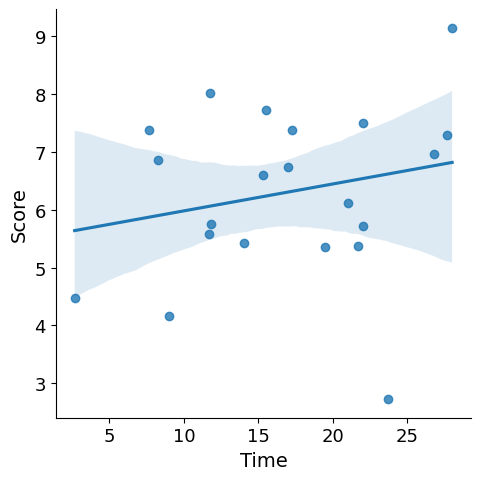

In [64]:
sns.lmplot(x="Time", y="Score", data=time_grades_df);

There is no correlation in this case either.

## Machine learning based analysis: dimensionality reduction and clustering of the data

Even though the reduced number of data points (44 total students) for this use case makes the application of machine learning a difficult task, we can still try something. For instance, let's focus only on the mobile students, since they have a greater number of features to work with. Let's assume that the average grade they obtain in the app (which we have analysed above) is a function of the number of interactions they have made, the number of accepted suggestions, the time they have left, and the average score for the survey answers.

We will apply a PCA (Principal Component Analysis) model to find out the principal components that explain the variance in the data, in this case the obtained grades. We will also be able to visualize the relationships between the principal components and the grades in a 2D space and create clusters for them.

In [65]:
accepted_suggestions = accepted_grades_df.drop("Score", axis=1)

In [66]:
df_ai = time_grades_df.merge(accepted_suggestions, left_on="Student", right_on="Student")
ai = df_ai.merge(int_mobile_df, left_on="Student", right_on="Student")
ai.columns = ["student", "grade", "time_left", "accepted_suggestions", "survey_score", "interactions"]
ai.head()

,student,grade,time_left,accepted_suggestions,survey_score,interactions
0,Android4,2.726667,23.666667,4,3.65,106
1,Tablet102,4.166667,9.000000,4,4.10,140
2,Android202,4.476667,2.666667,3,2.75,81
3,Tablet101,5.362500,19.500000,4,3.90,126
4,iPhone102,5.366667,21.666667,4,4.40,135


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = ai.drop(["grade", "student"], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X_std)

result = pd.DataFrame(principal_components[:, 0:2], columns=['PC1', 'PC2'])
result['grade'] = ai['grade']

In [68]:
def pca_plot(df, coeff, labels=None, fname=None):
    xs = df['PC1']
    ys = df['PC2']
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    df['PC1_s'] = xs * scalex
    df['PC2_s'] = ys * scaley
    sns.scatterplot(x='PC1_s', y='PC2_s', hue='grade', data=df)
    #plt.scatter(,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    #plt.grid()
    if fname is not None:
        plt.savefig(img_folder / fname)
    plt.show()

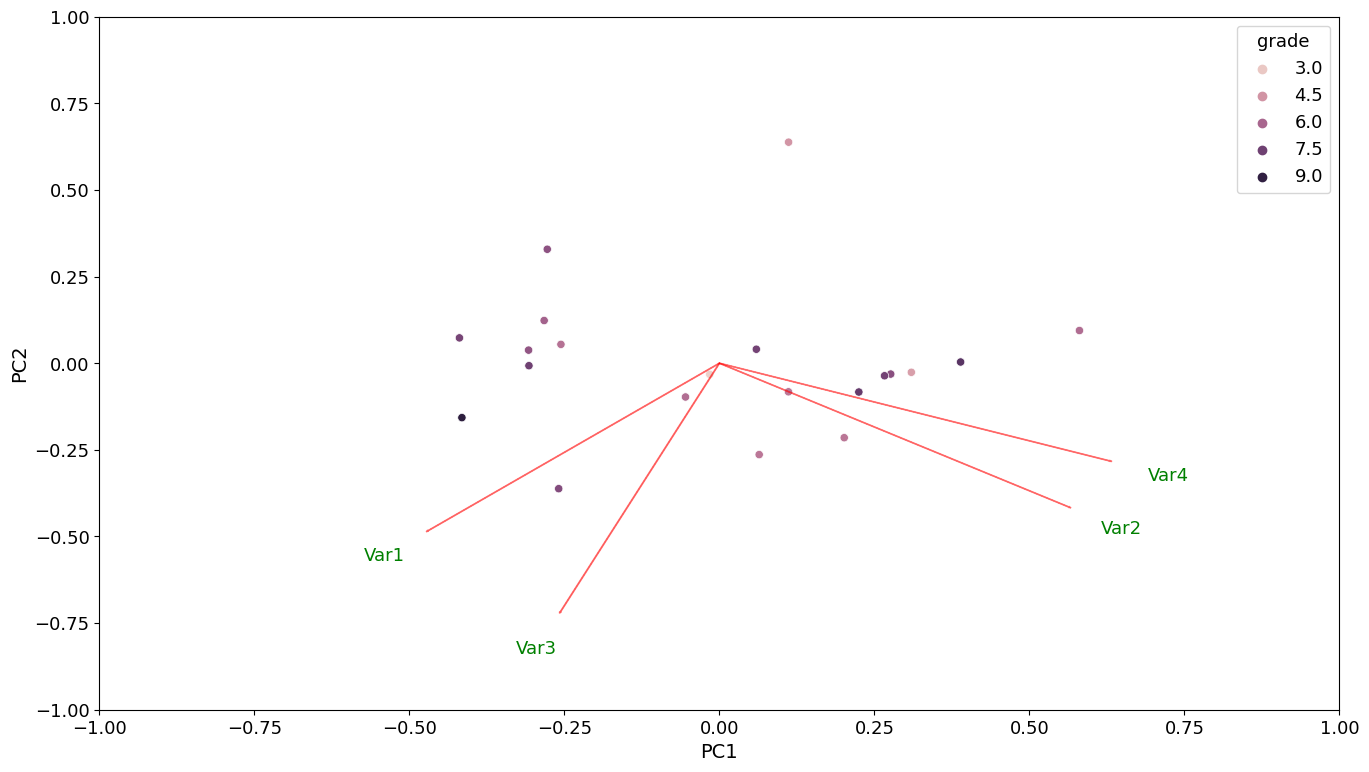

In [69]:
pca_plot(result, np.transpose(pca.components_[0:2, :]), None, 'PCA_grades')


Let's see what amount of variance each PC holds:

In [70]:
pca.explained_variance_ratio_

array([0.42552987, 0.29534542, 0.16913652, 0.10998818])

The first PC explains 42.5% of the data, while the second the 29.5%. Together, they explain about 72% of the data.
Now, let's find the most important features

In [71]:
print(f'Features for first principal component: {abs(pca.components_[0, :])}')
print(f'Features for second principal component: {abs(pca.components_[1, :])}')

Features for first principal component: [0.46988777 0.56355528 0.25643592 0.62916735]
Features for second principal component: [0.48335712 0.41492163 0.71750073 0.28177763]


Here, we can see that for PC1 the most important feature is the fourth one, while for PC2 it is the third.

We have applied the PCA model and now we can identify clusters using KMeans. First, we want to estimate the number of clusters (we are going to use the silhouette score for this).

In [72]:
import matplotlib.cm as cm

def do_silhouette_score_and_plot(X, fname):

    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.savefig(img_folder / fname)
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4486539441064556
For n_clusters = 3 The average silhouette_score is : 0.33147893272674495
For n_clusters = 4 The average silhouette_score is : 0.37799959180053005
For n_clusters = 5 The average silhouette_score is : 0.2876916253178162
For n_clusters = 6 The average silhouette_score is : 0.281035804862774


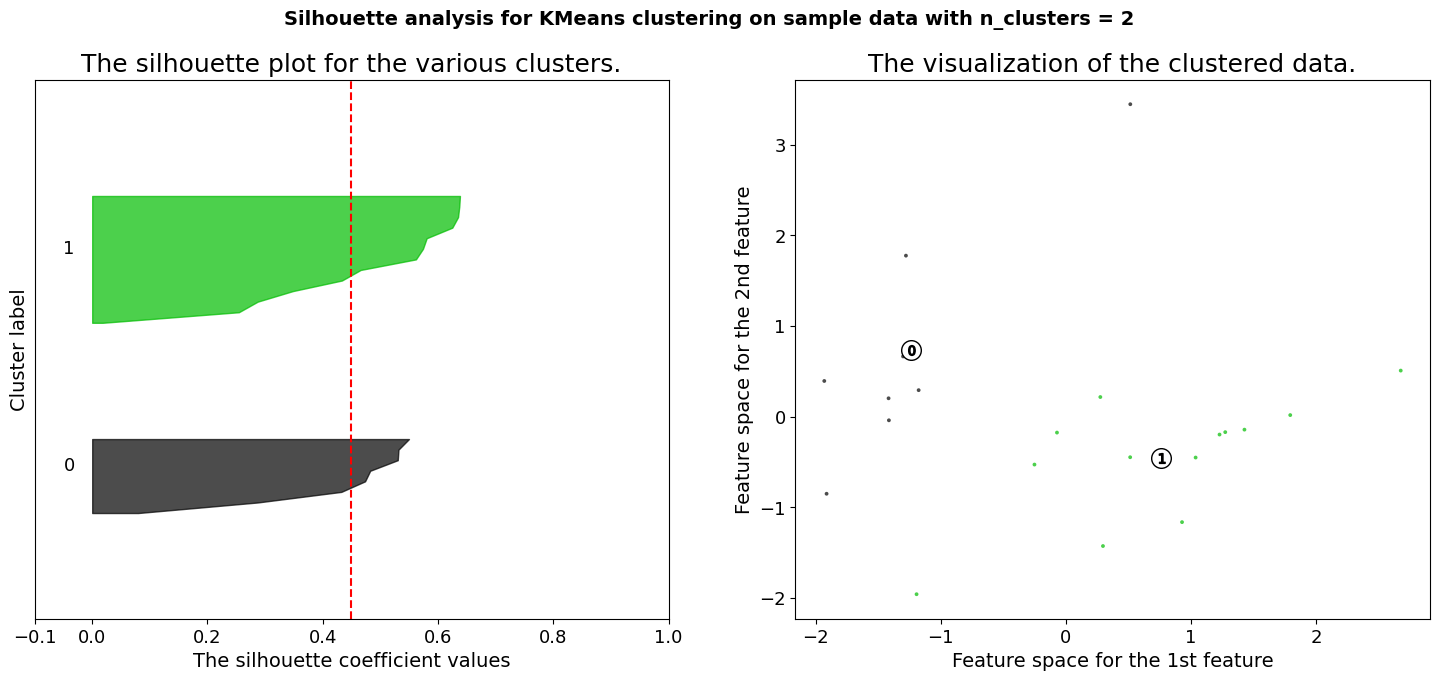

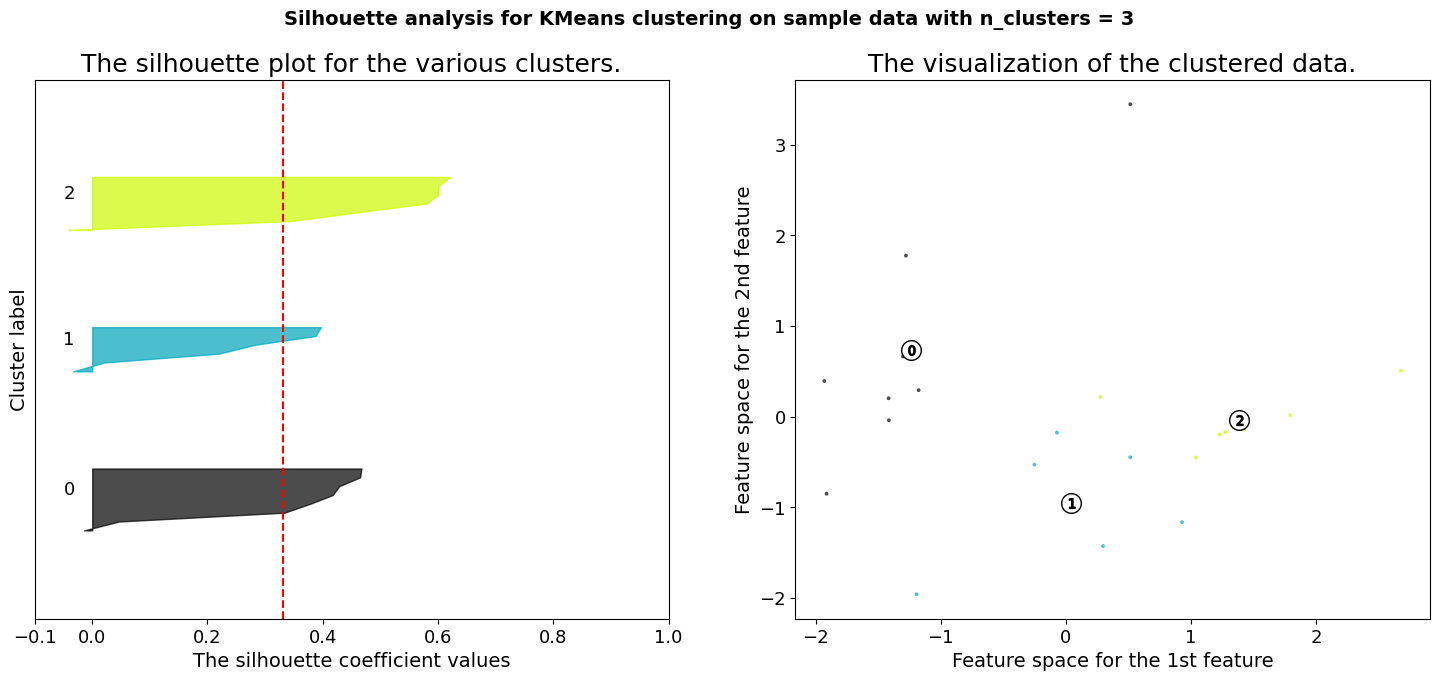

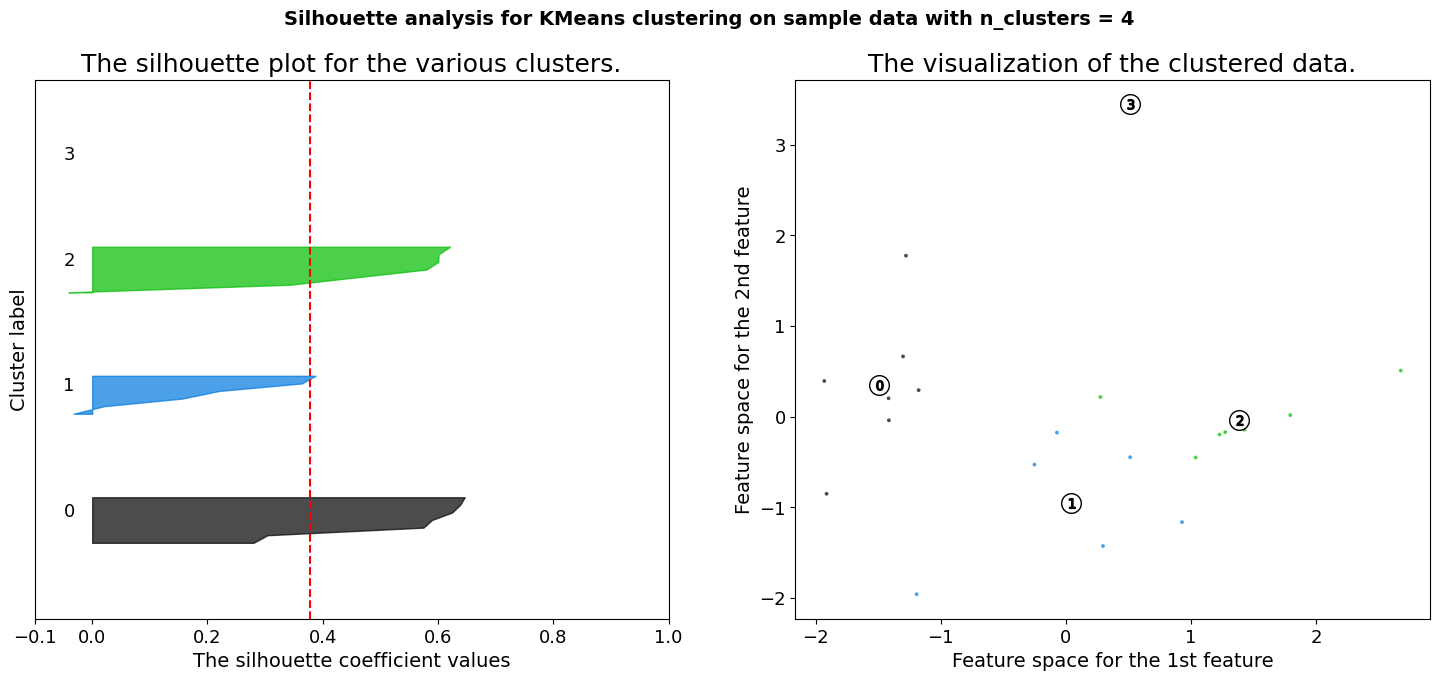

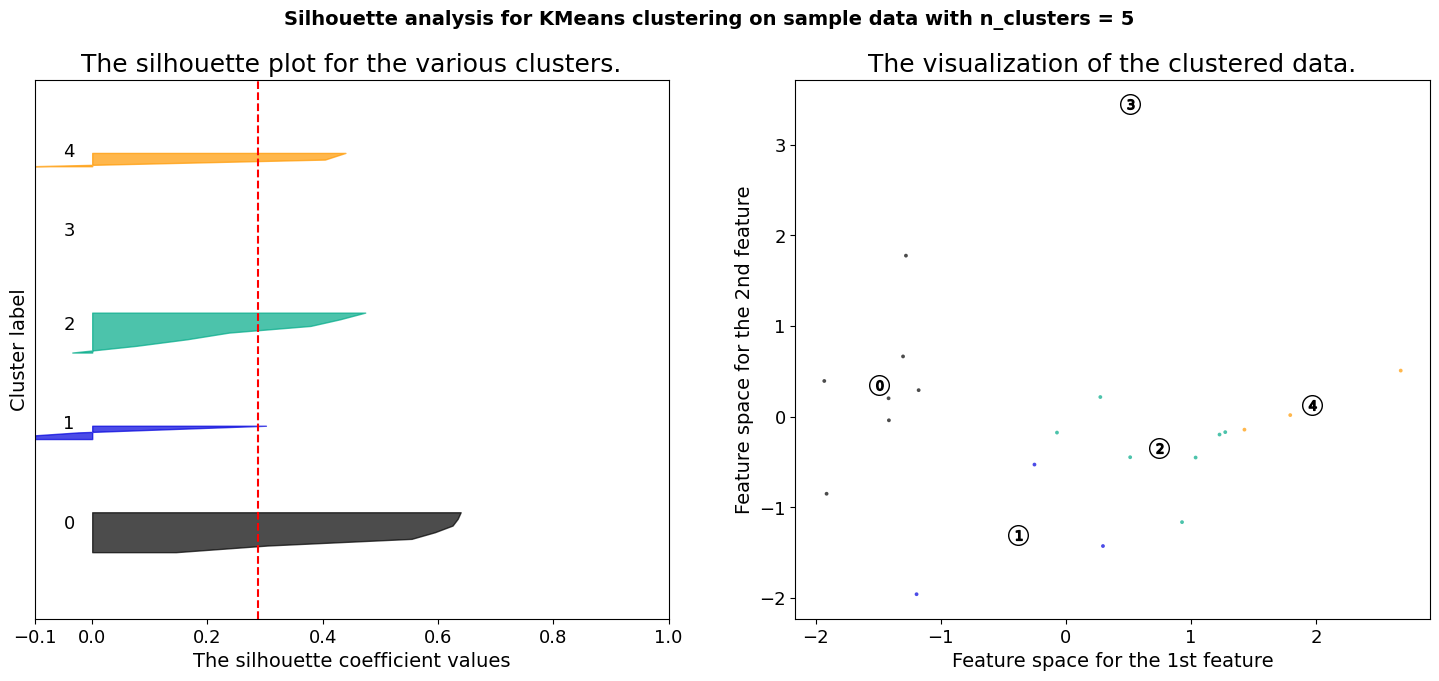

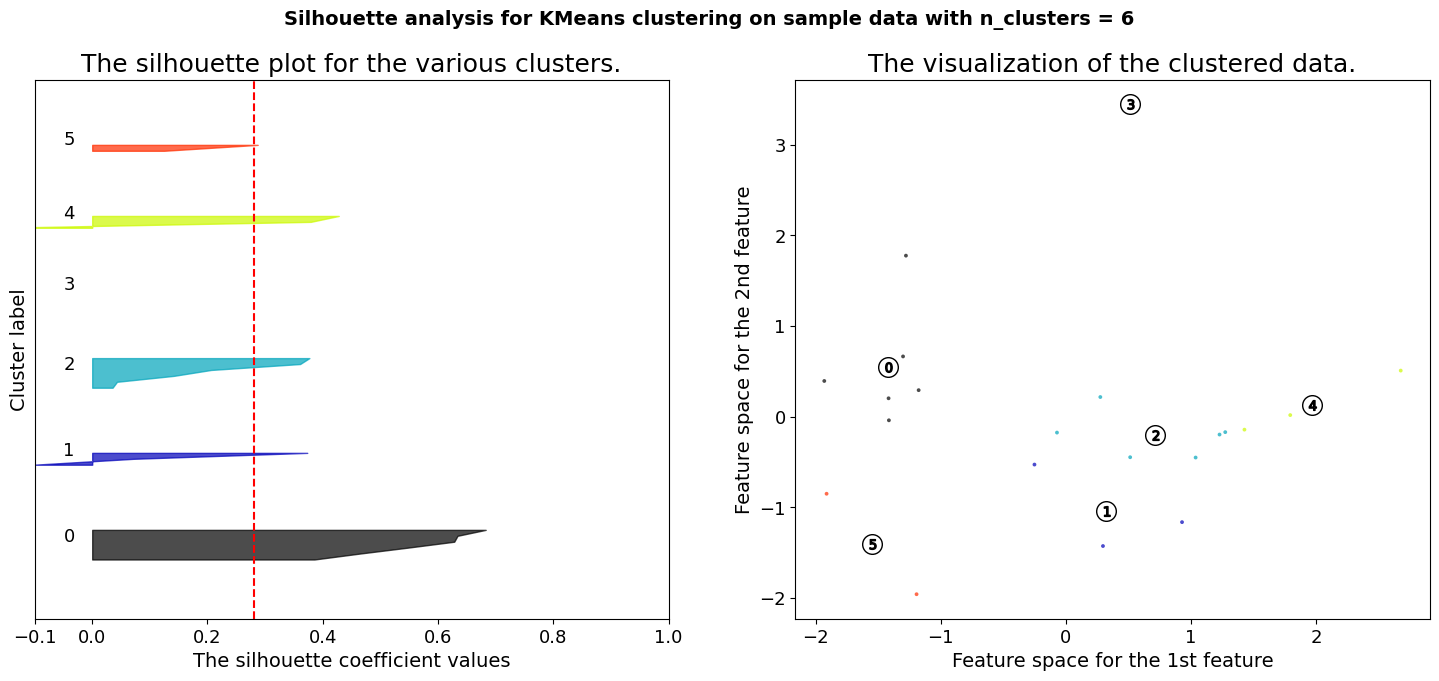

In [73]:
do_silhouette_score_and_plot(principal_components[:, 0:2], 'silhouette_grades')

It seems that the optimal number of clusters is 4, with one of the clusters comprised of just one element. Let's run again KMeans with 4 clusters and save the resulting image

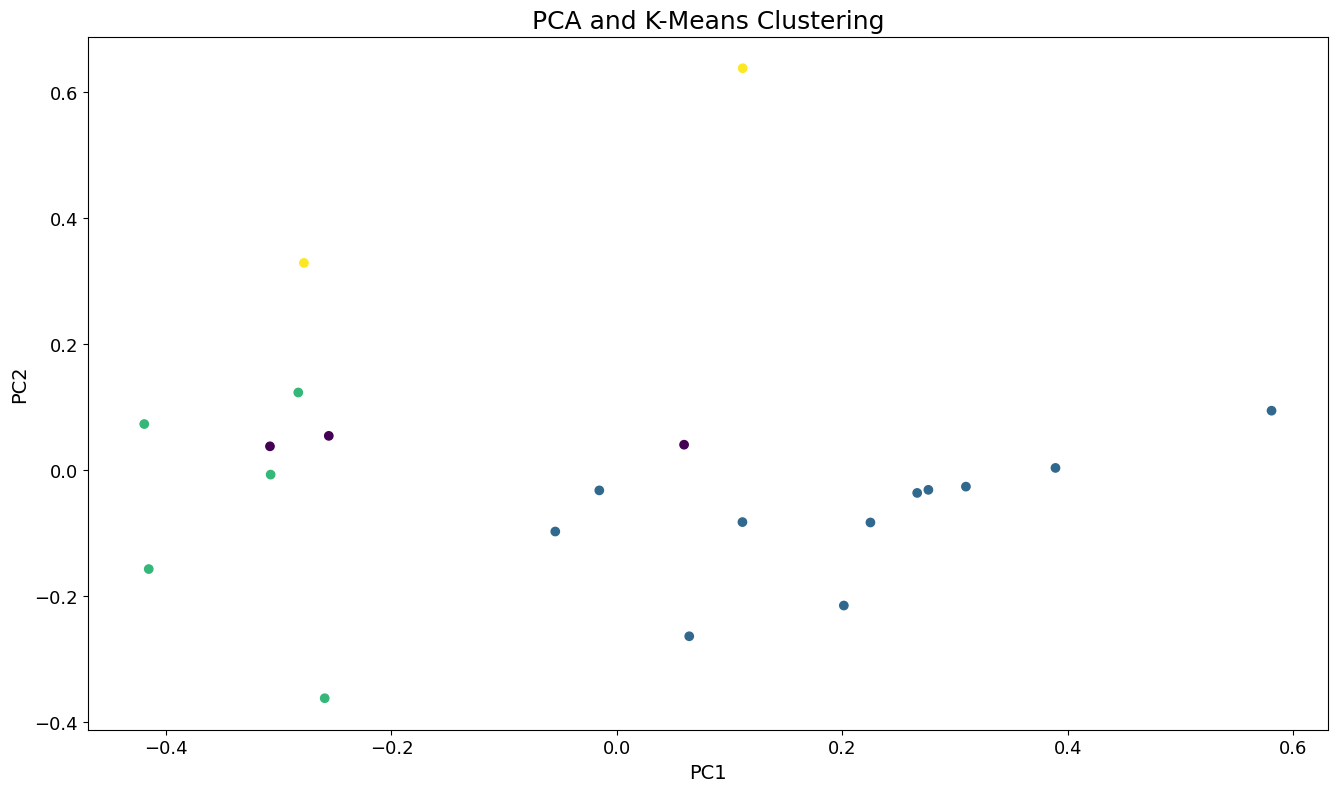

In [74]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_
scalex = 1.0/(principal_components[:, 0].max() - principal_components[:, 0].min())
scaley = 1.0/(principal_components[:, 1].max() - principal_components[:, 1].min())
plt.scatter(principal_components[:, 0]* scalex, principal_components[:, 1]* scaley, c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA and K-Means Clustering')
plt.savefig(img_folder / 'PCA_grades_4_clusters')
plt.show()

We can also try creating clusters for the survey scores:

For n_clusters = 2 The average silhouette_score is : 0.45047986242424976
For n_clusters = 3 The average silhouette_score is : 0.20895170727827117
For n_clusters = 4 The average silhouette_score is : 0.3158748038685274
For n_clusters = 5 The average silhouette_score is : 0.3040954620003577
For n_clusters = 6 The average silhouette_score is : 0.25037440617777995


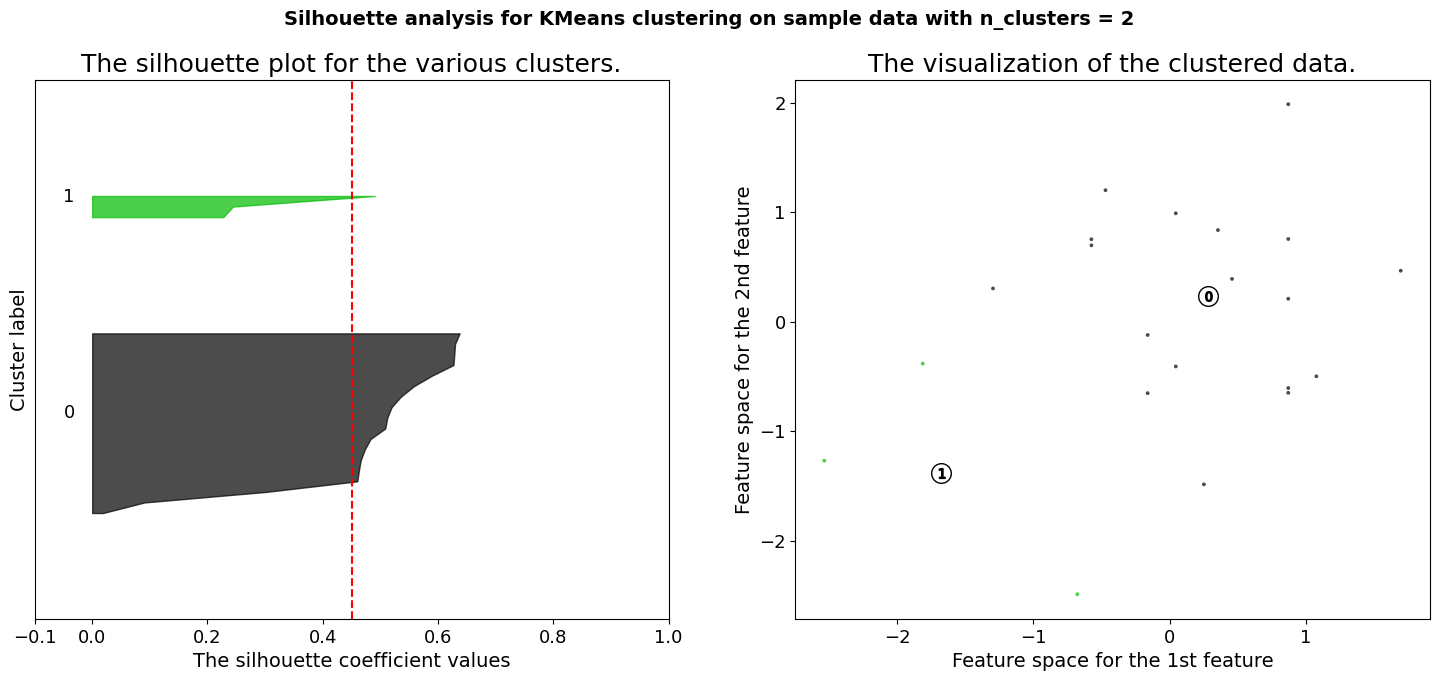

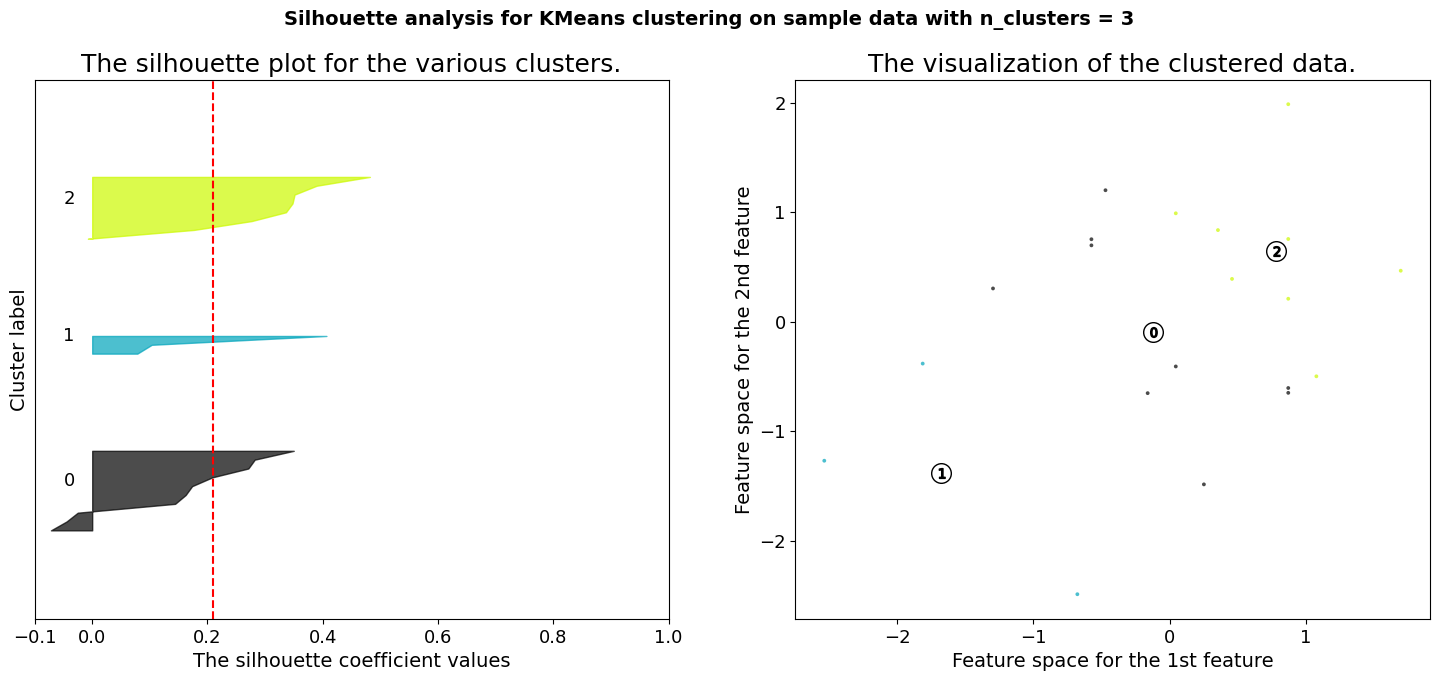

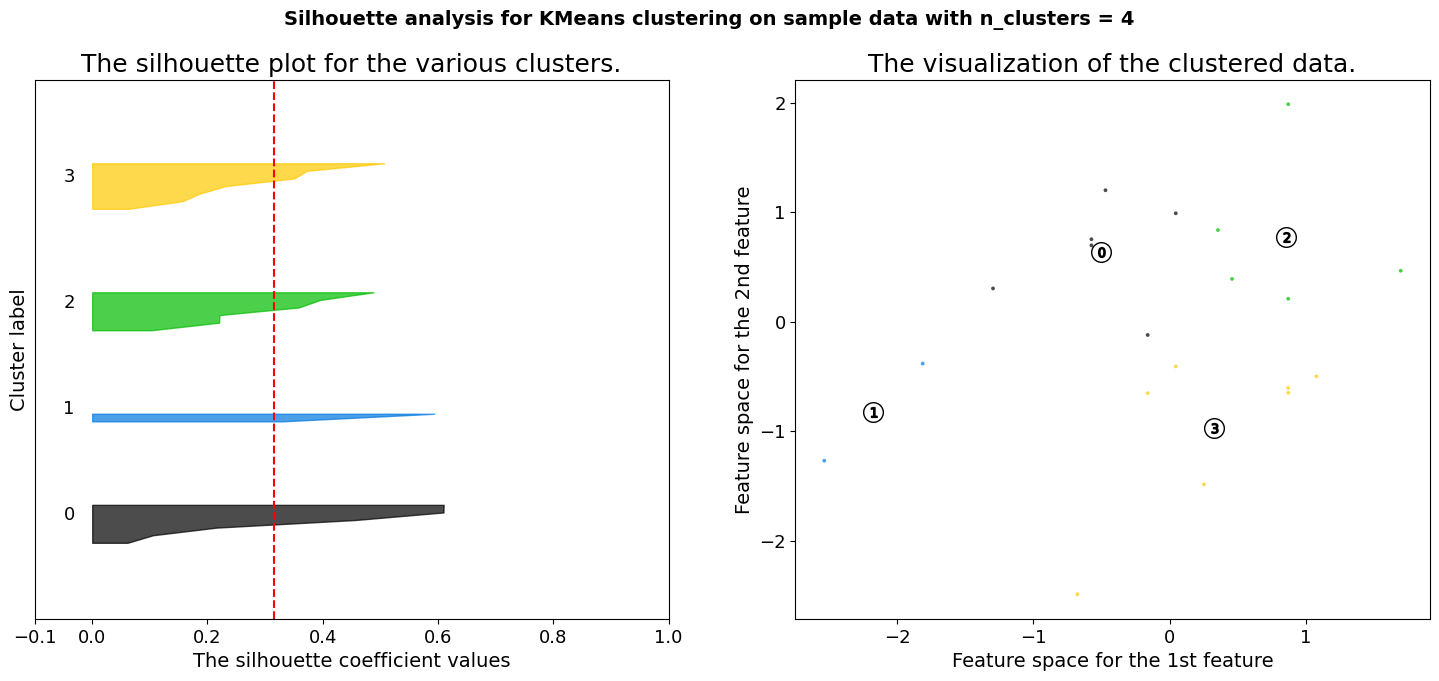

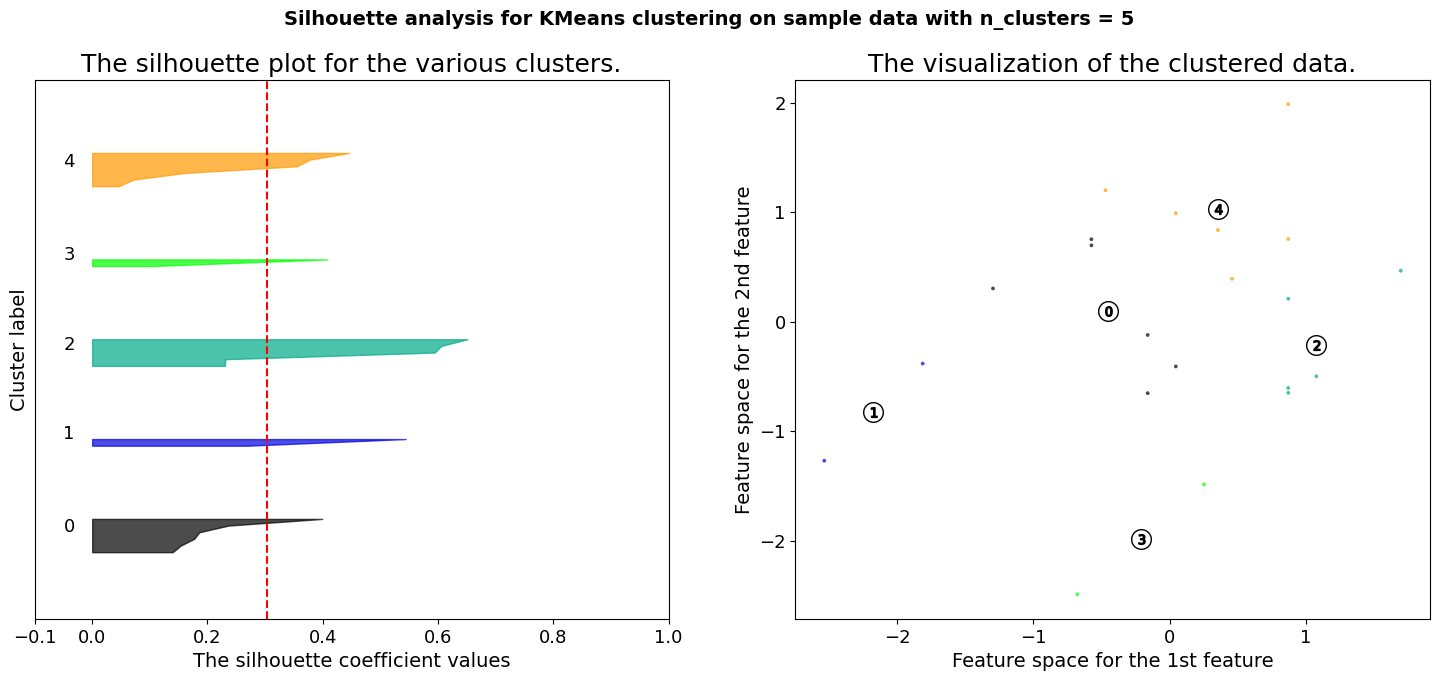

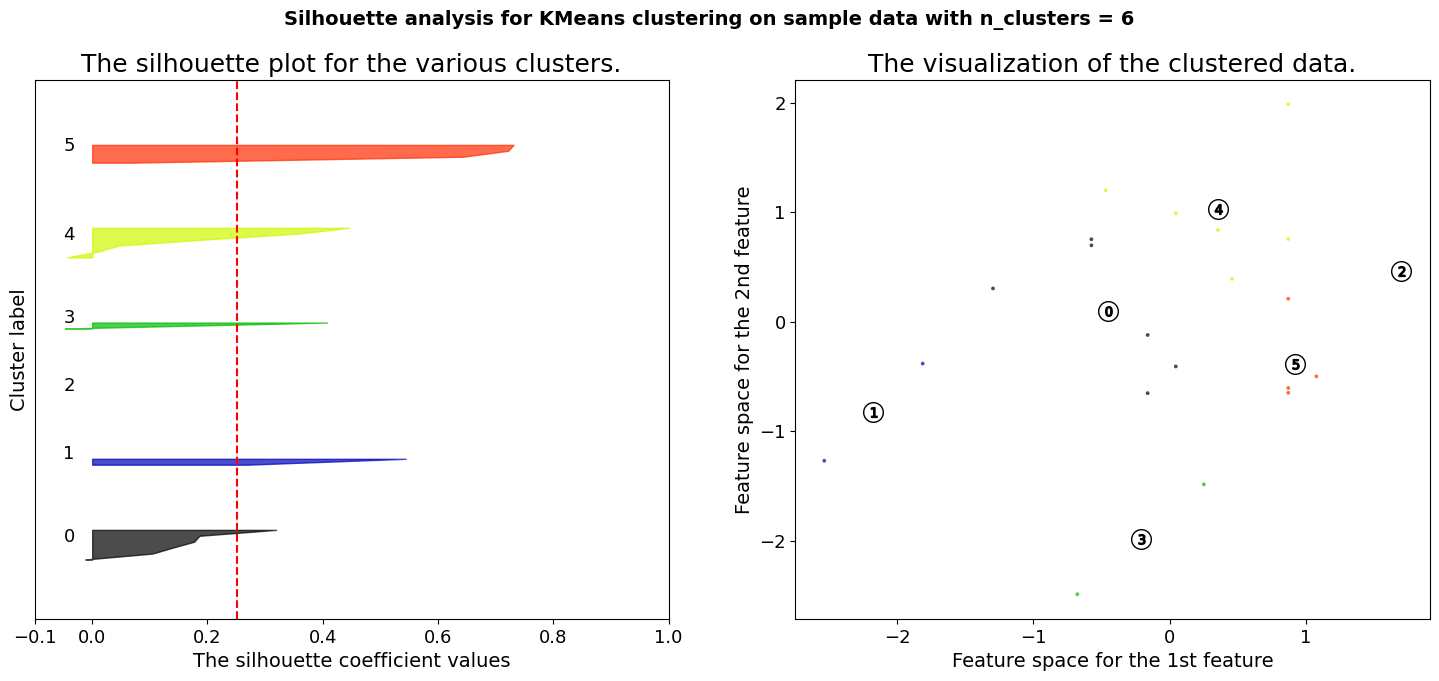

In [75]:
sur = ai["survey_score"].values.reshape(-1, 1)
sur_std = (sur - sur.mean(axis=0)) / sur.std(axis=0)

gr = ai['grade'].values.reshape(-1, 1)
gr_std = (gr - gr.mean(axis=0)) / gr.std(axis=0)

X = np.column_stack((sur_std, gr_std))

do_silhouette_score_and_plot(X, 'silhouette_survey_score')

In this case it seems that the appropriate number of clusters is 2. Let's create the clusters using KMeans and create a plot: 

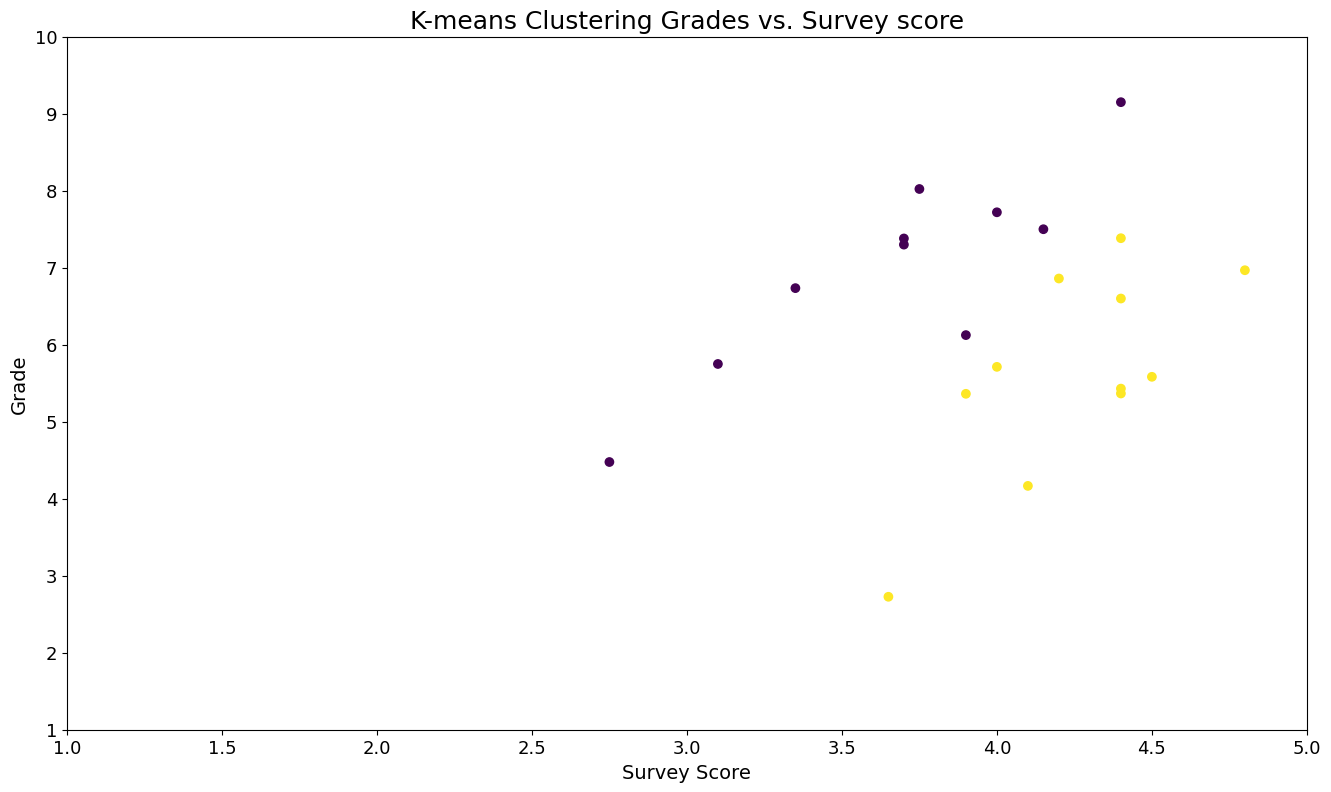

In [77]:
kmeans = KMeans(n_clusters=2, n_init='auto')

kmeans.fit(X)

cluster_labels = kmeans.labels_

plt.scatter(sur[:, 0], gr[:, 0], c=cluster_labels)
plt.xlabel('Survey Score')
plt.xlim(1, 5)
plt.ylim(1, 10)
plt.ylabel('Grade')
plt.title('K-means Clustering Grades vs. Survey score')
plt.savefig(img_folder / 'KMeans_scores_grades')
plt.show()